In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

False


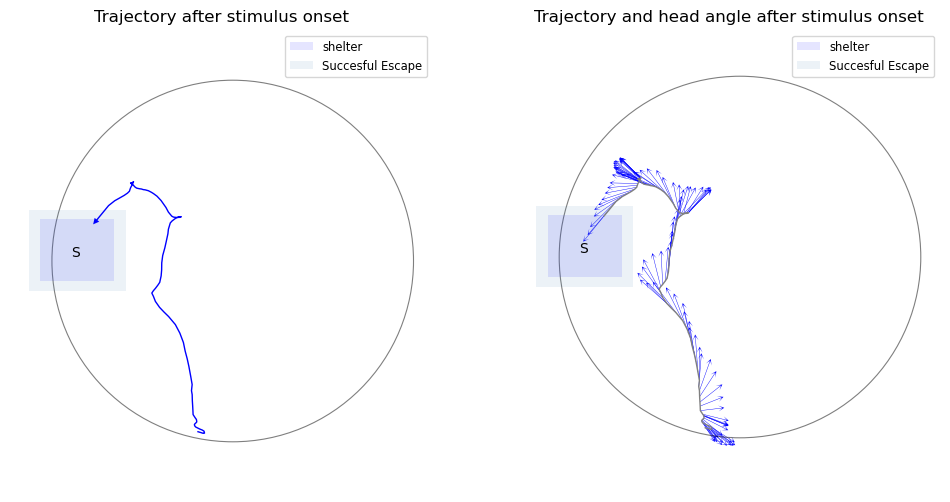

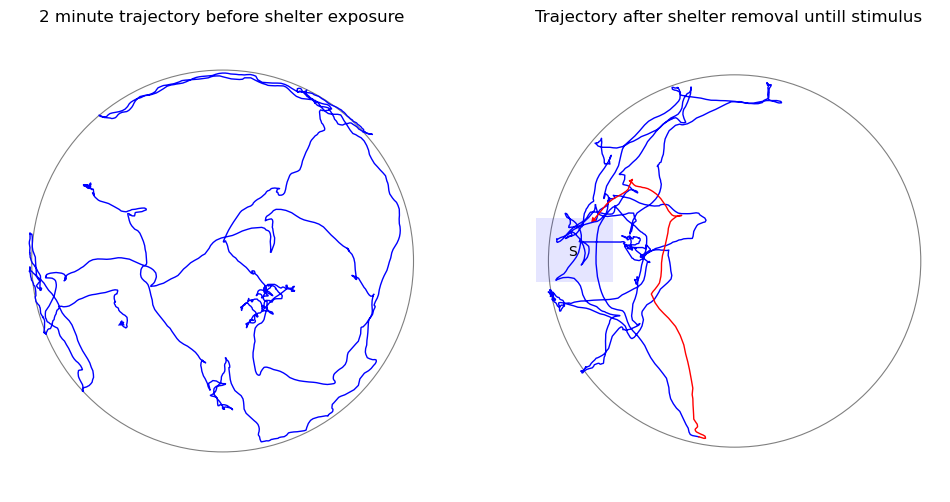

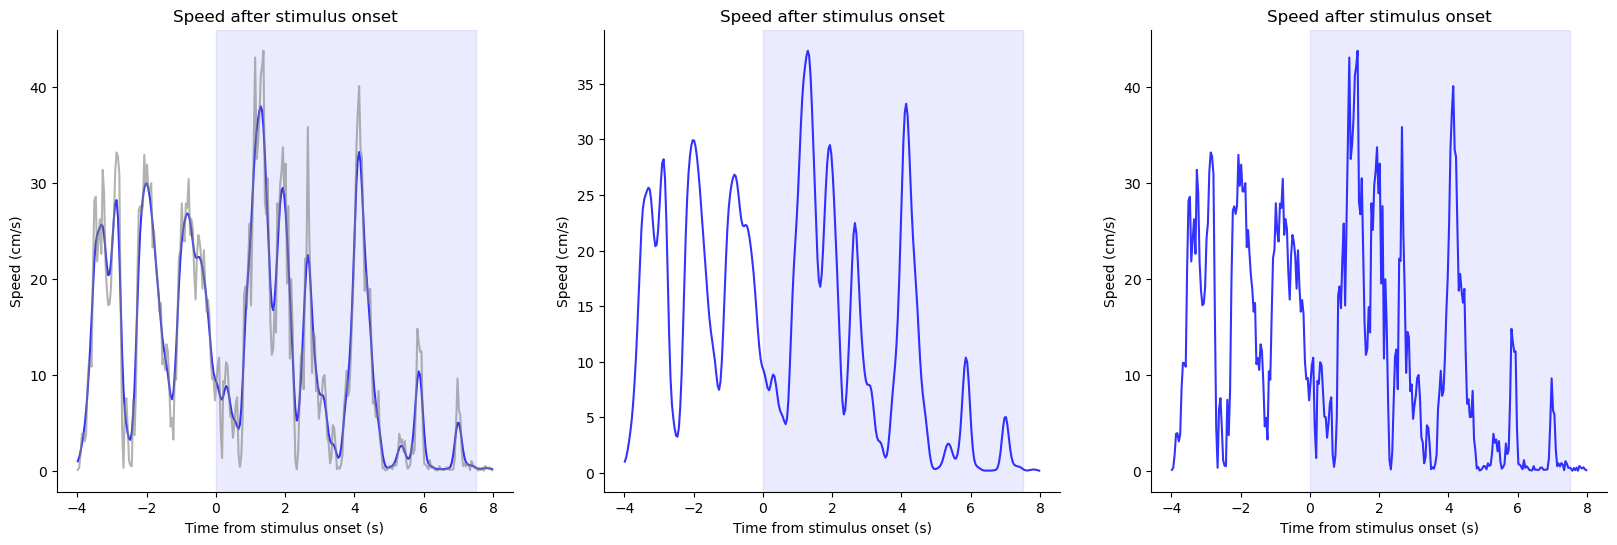

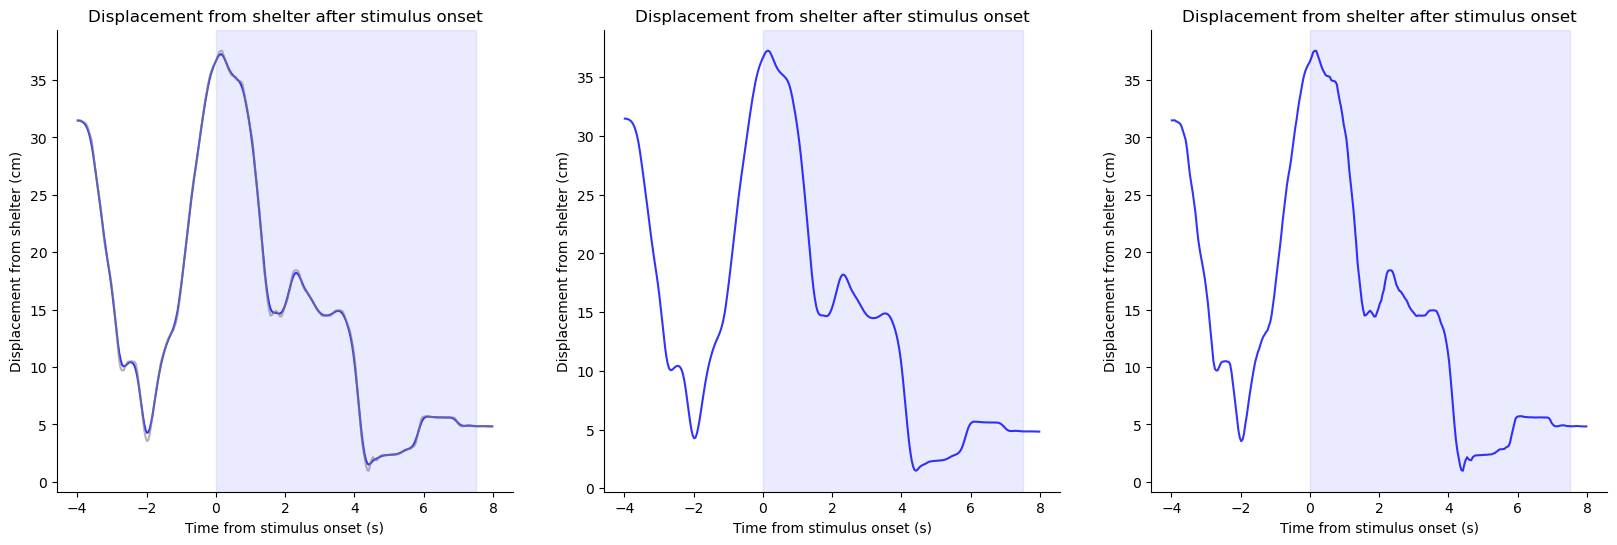

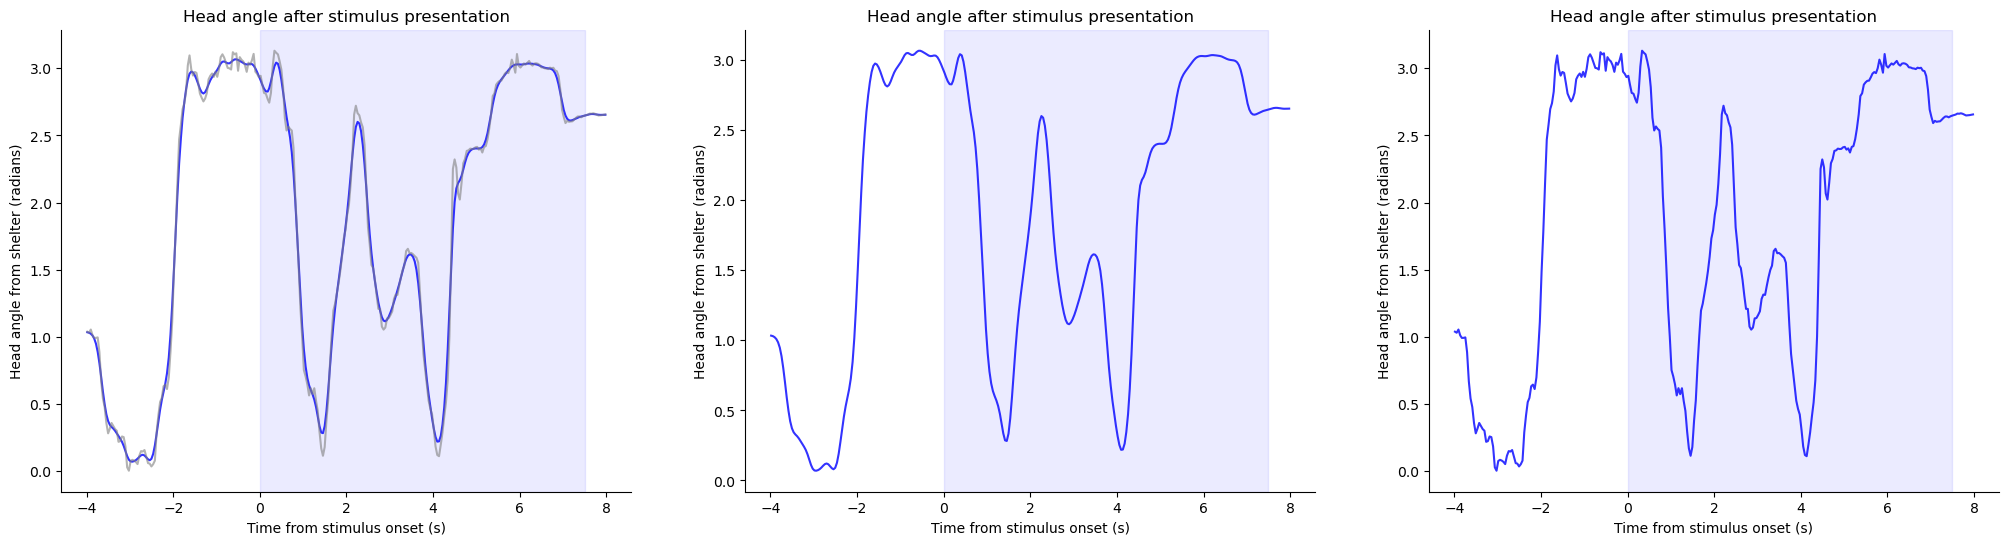

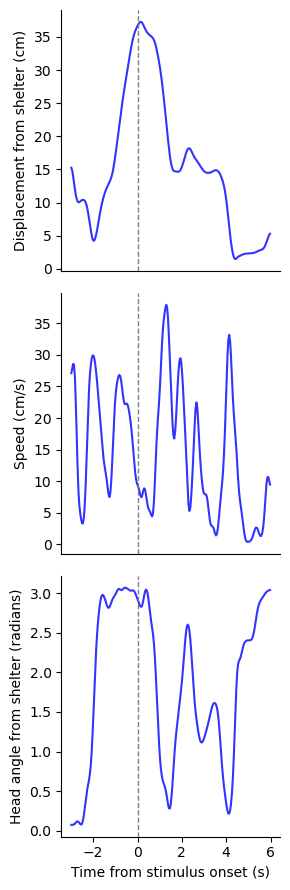

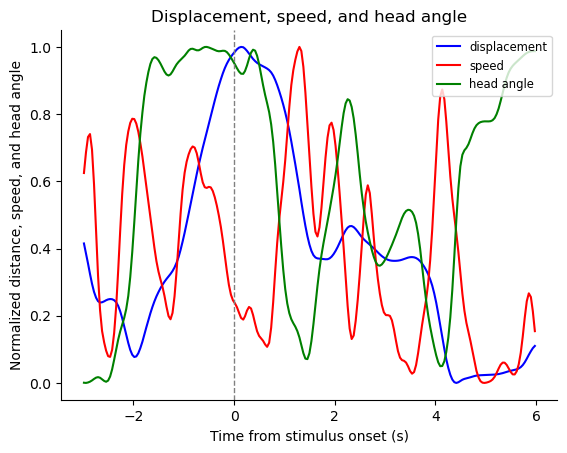

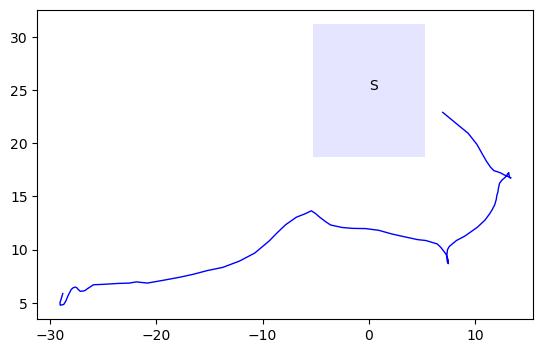

False


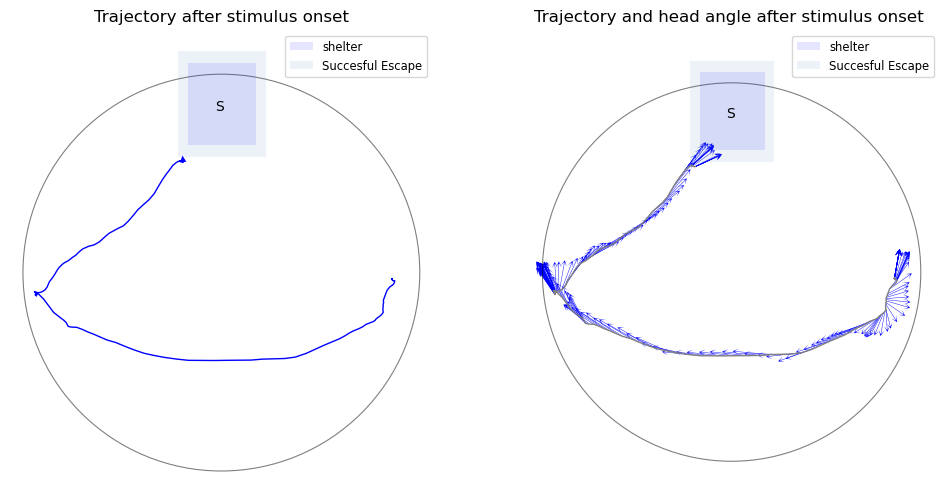

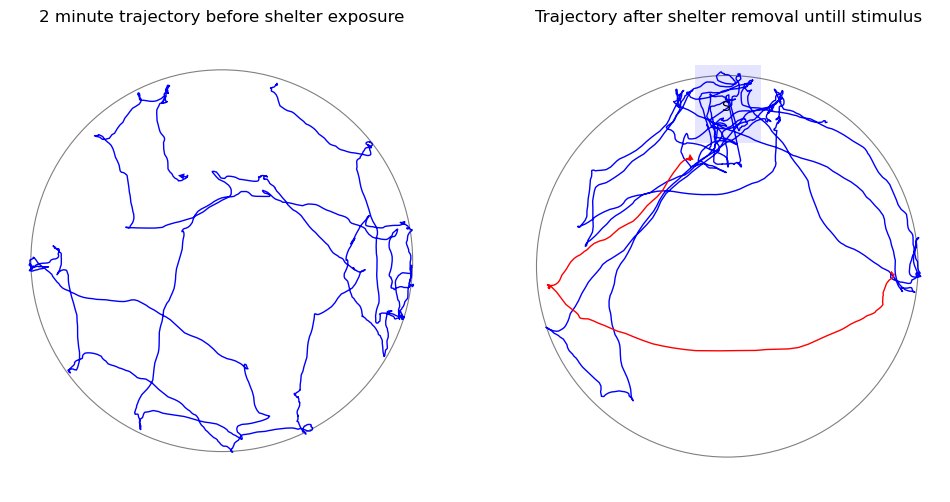

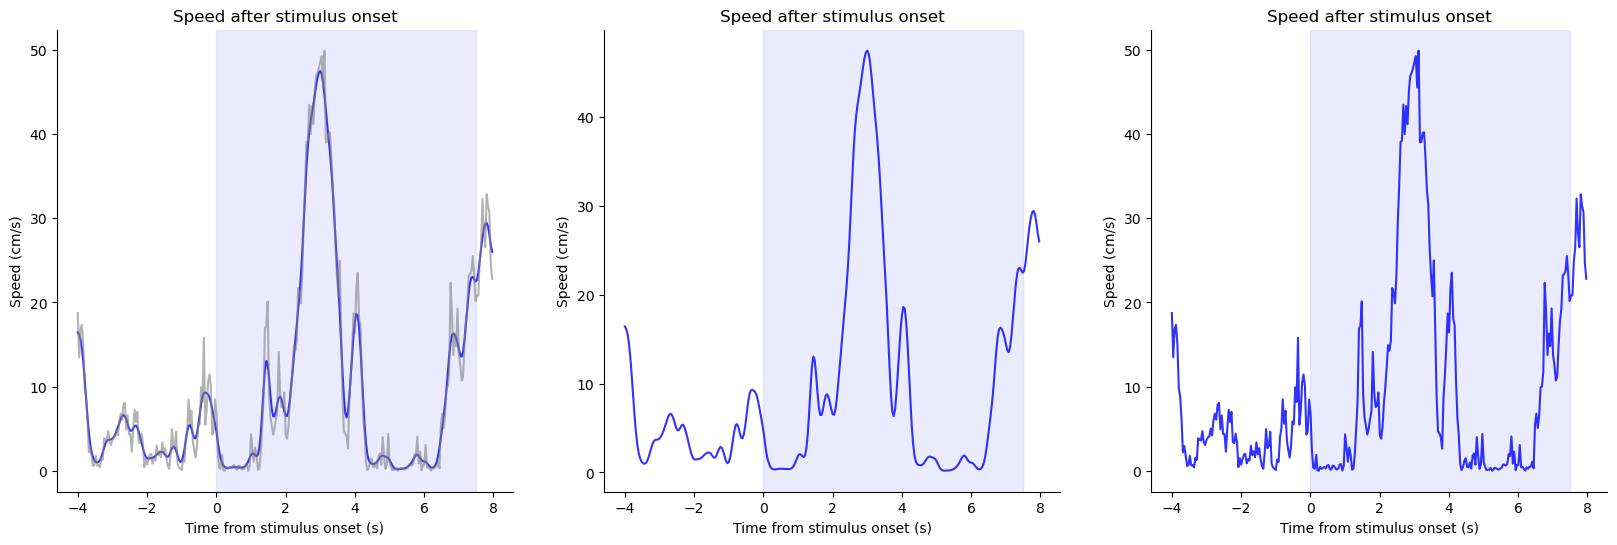

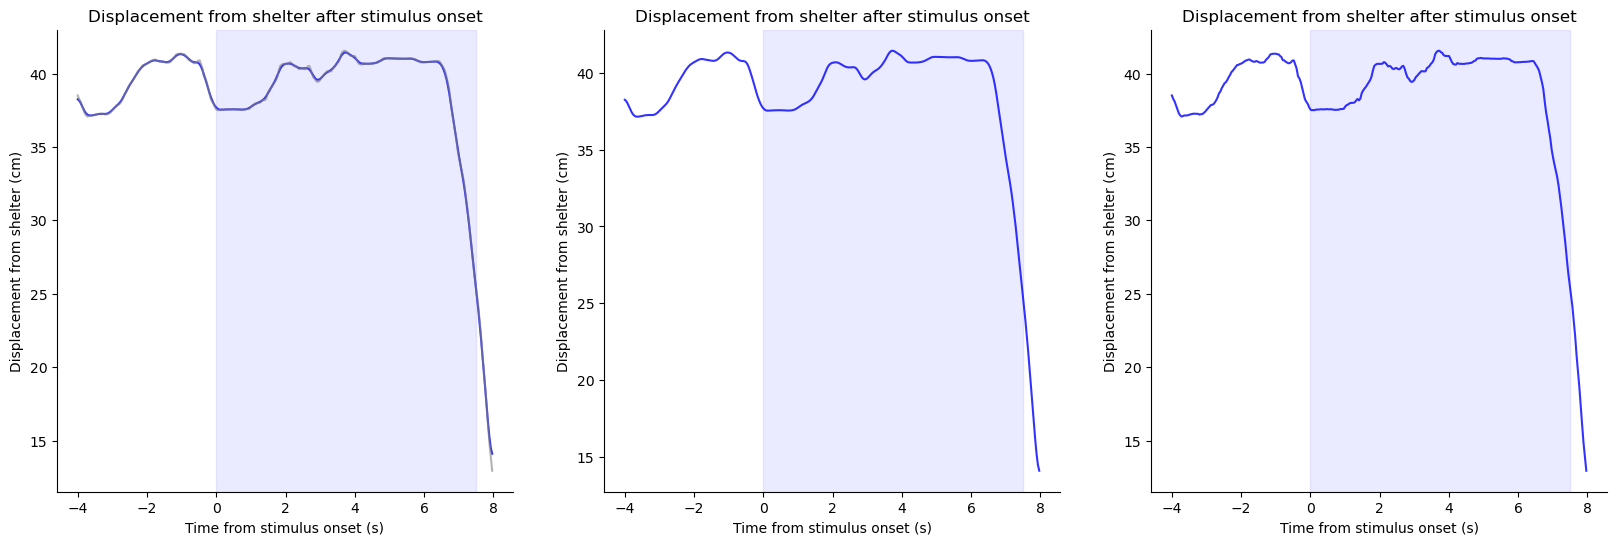

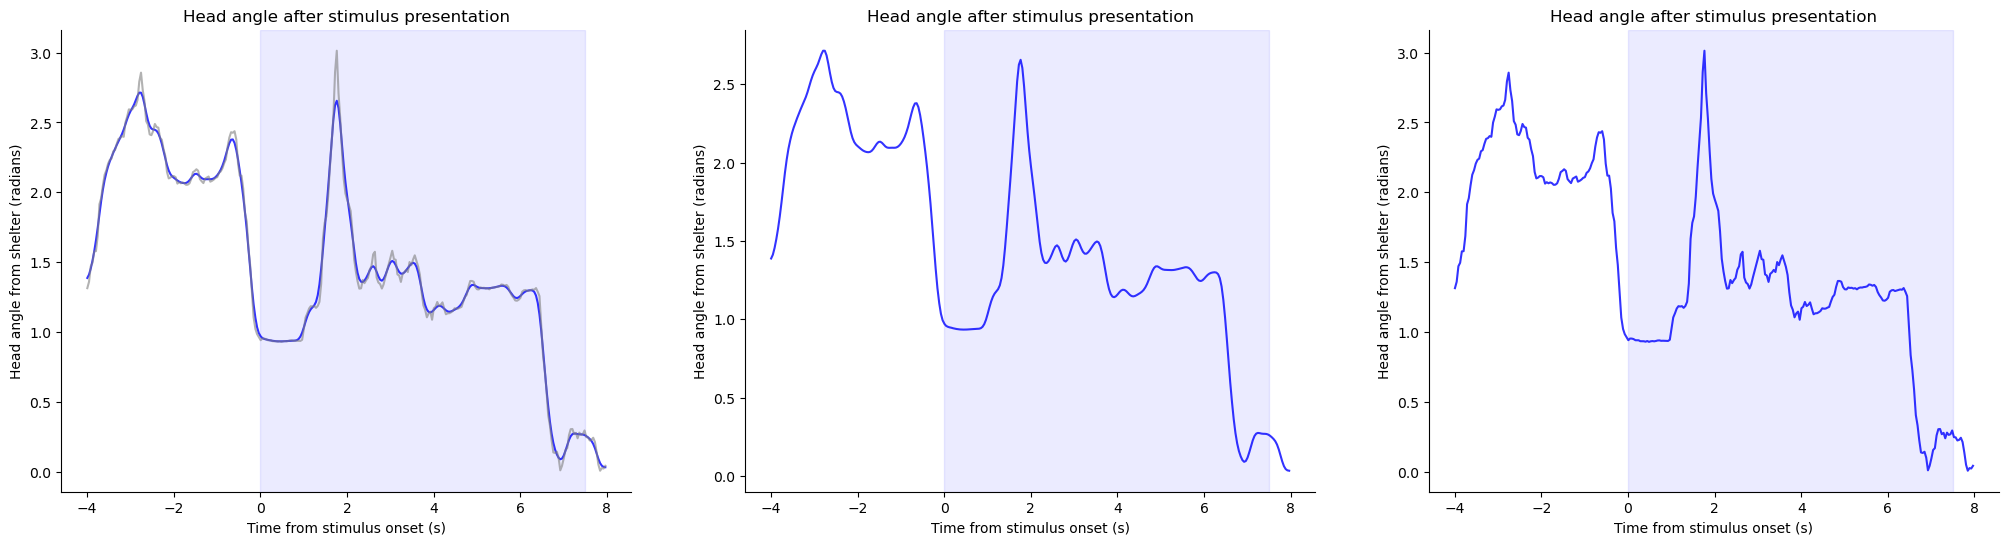

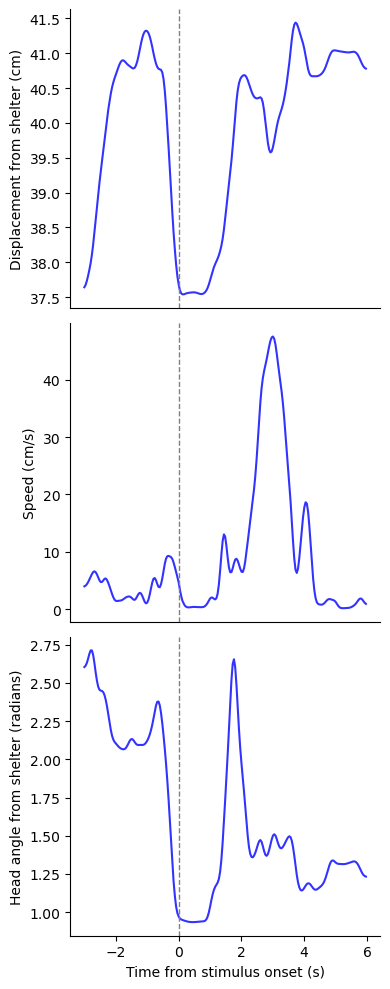

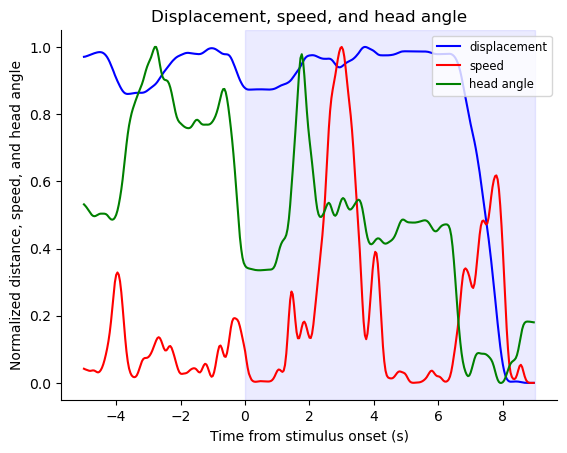

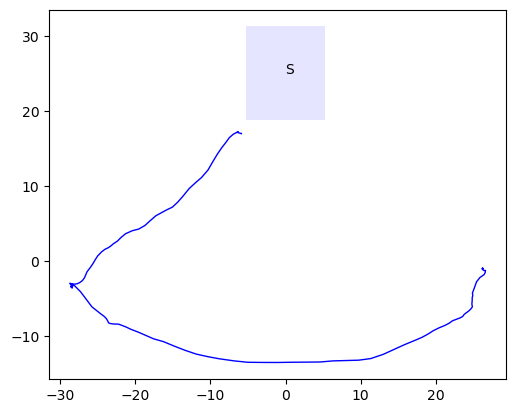

False


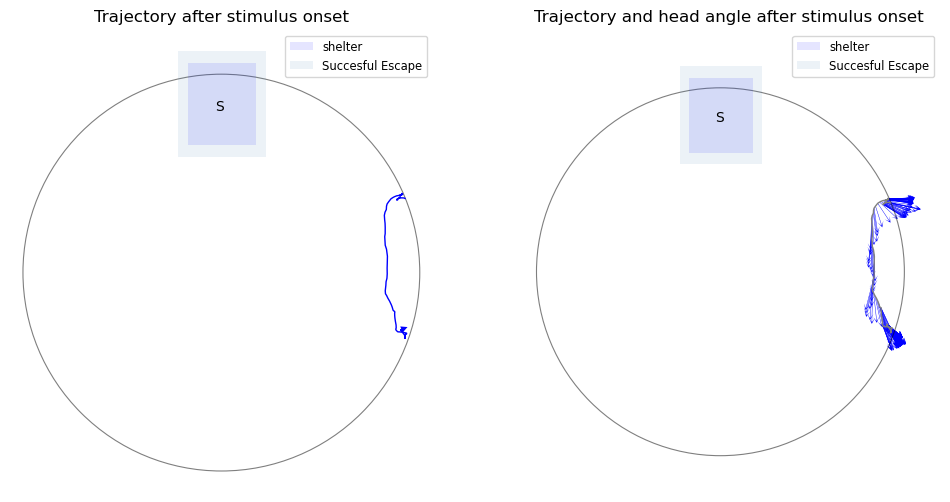

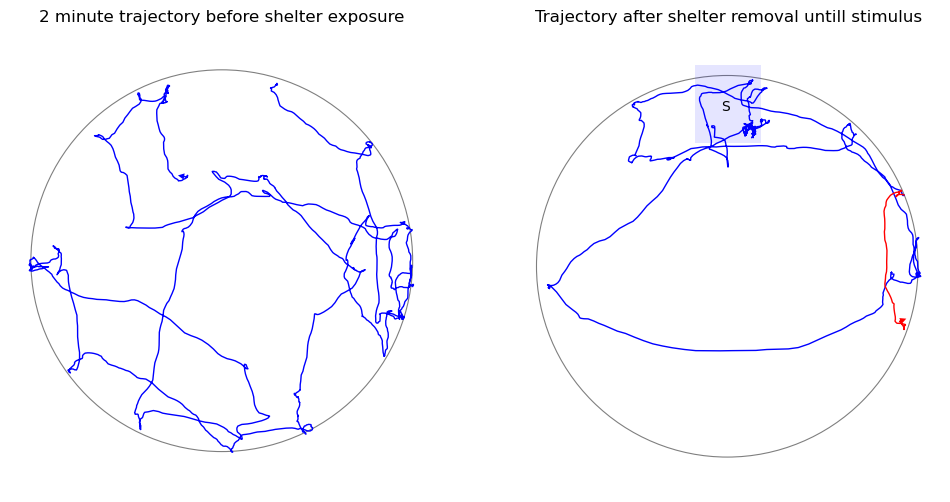

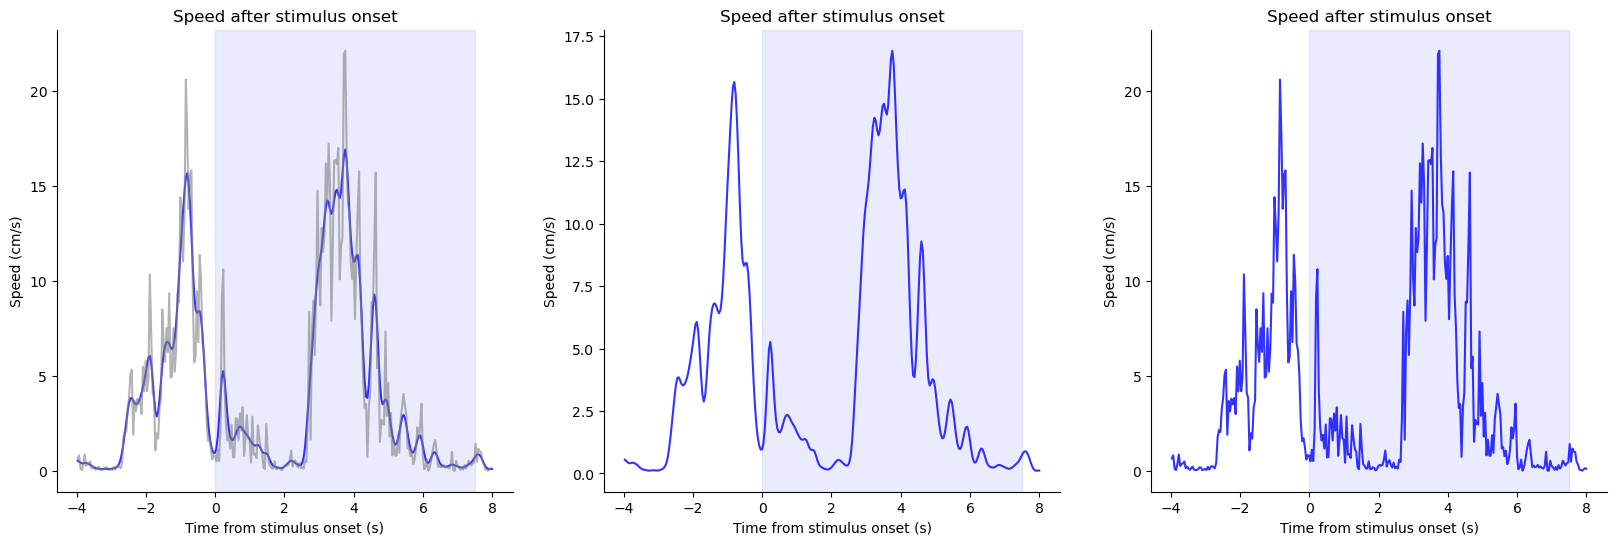

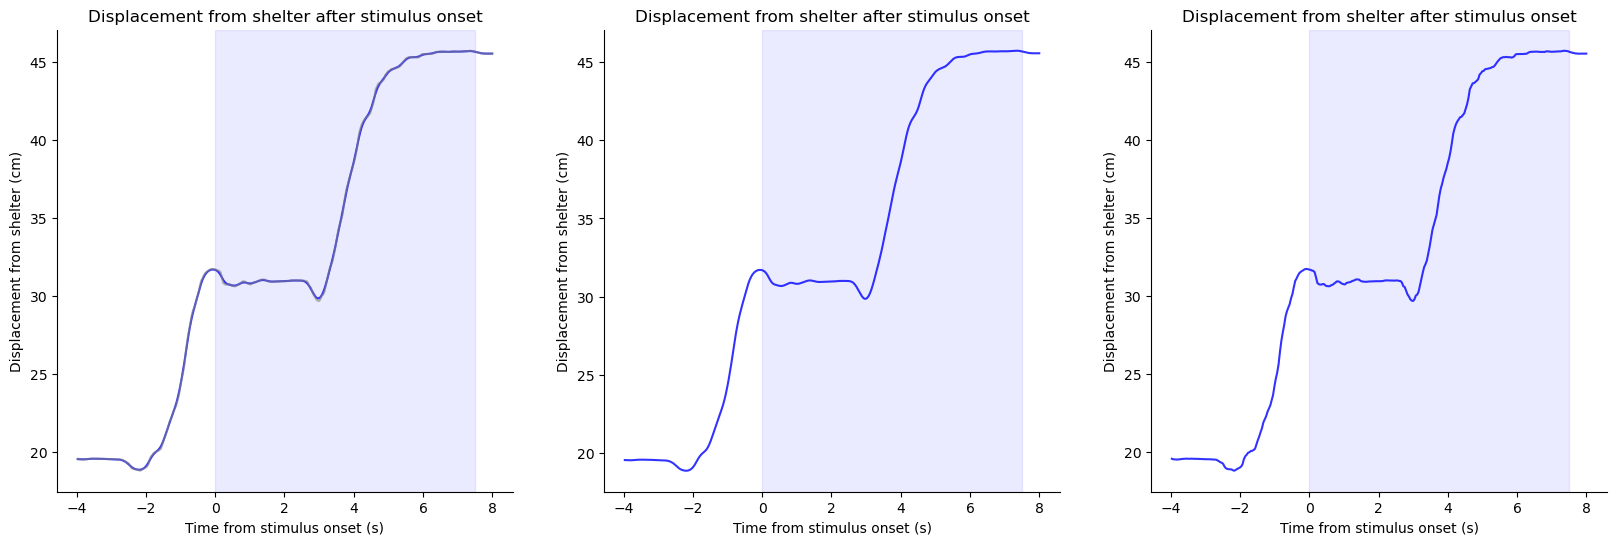

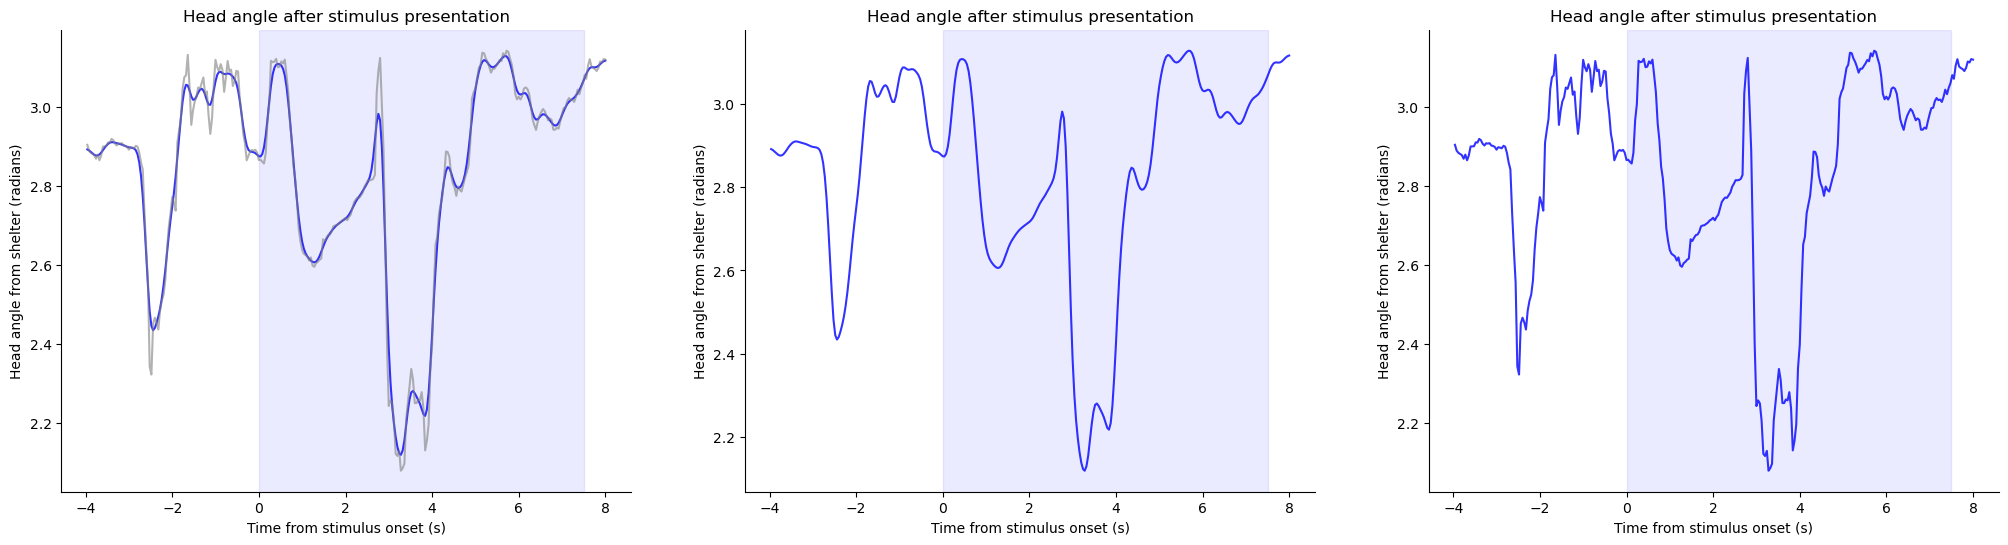

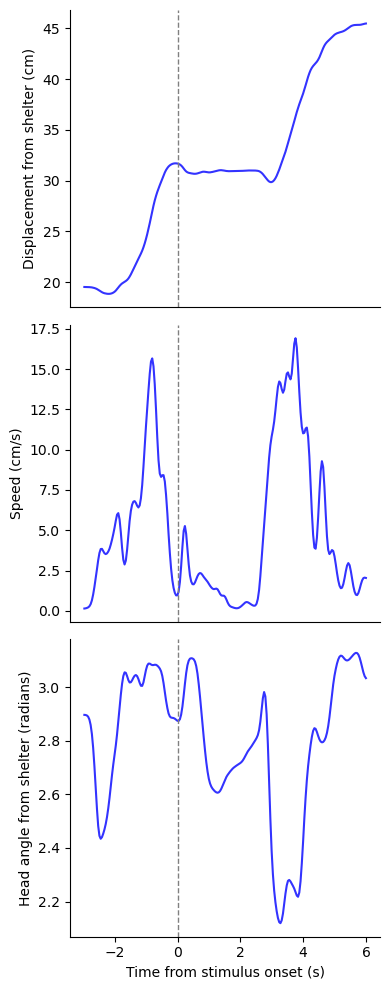

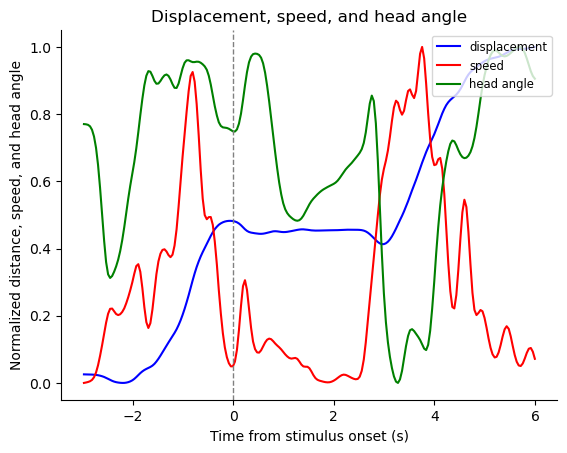

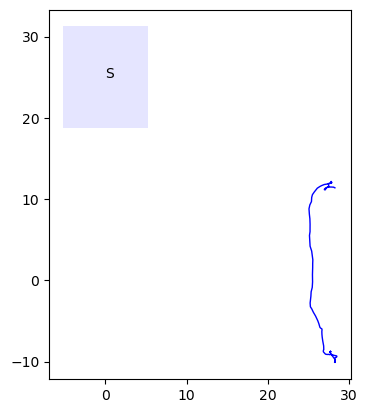

False


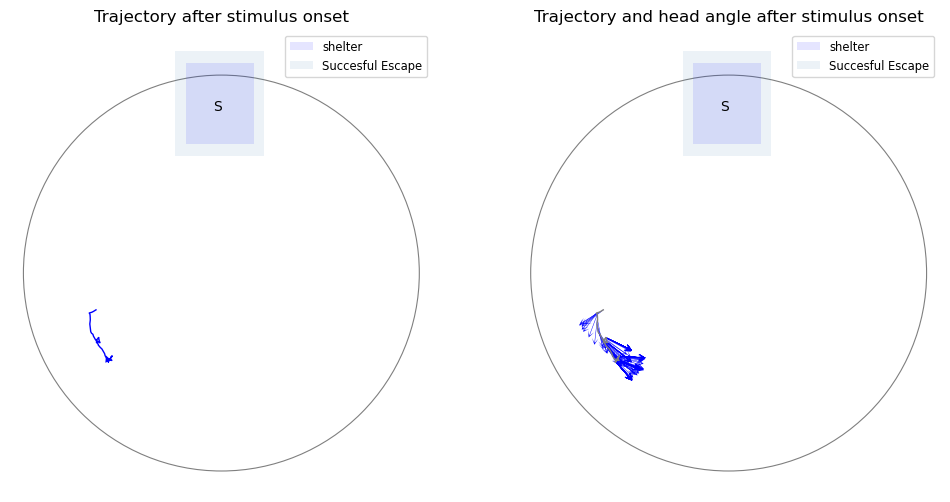

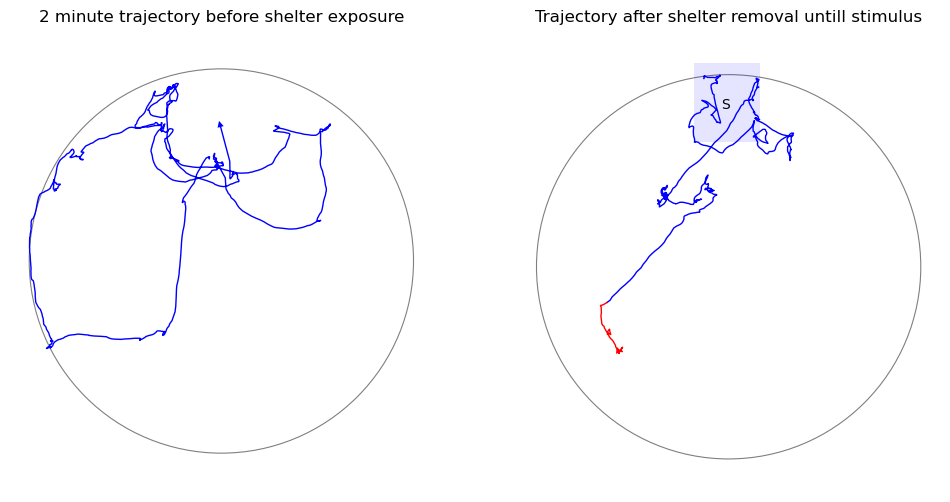

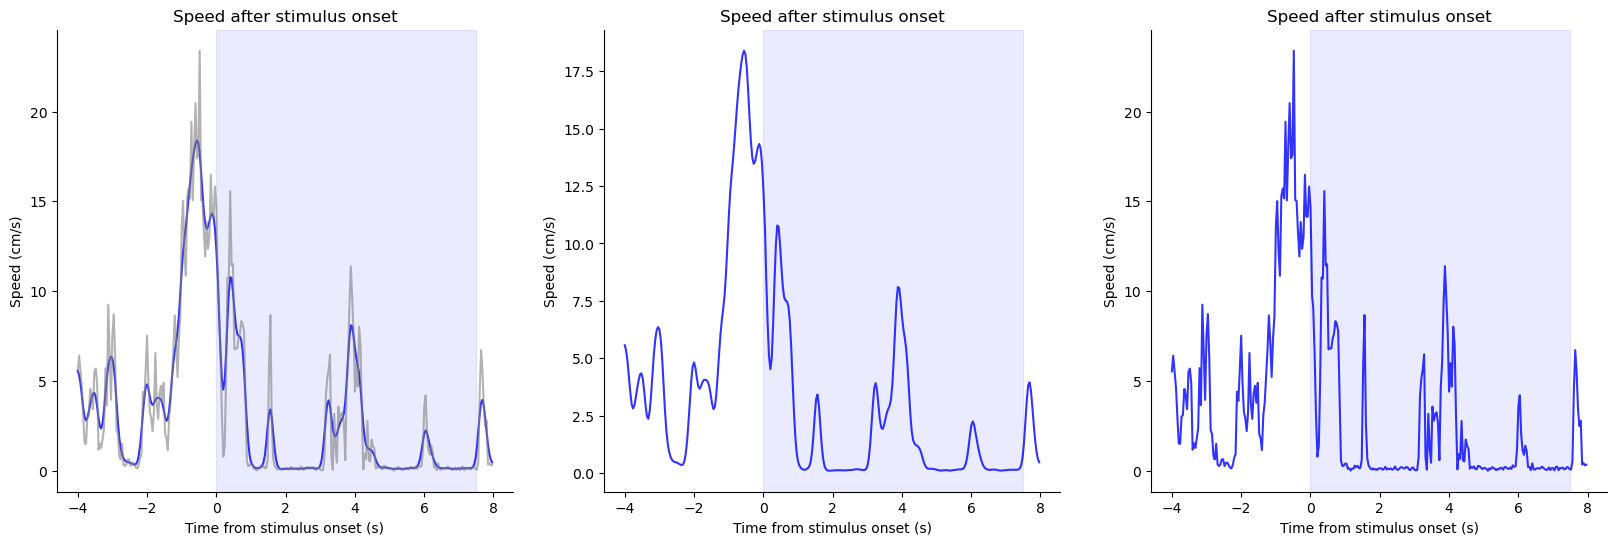

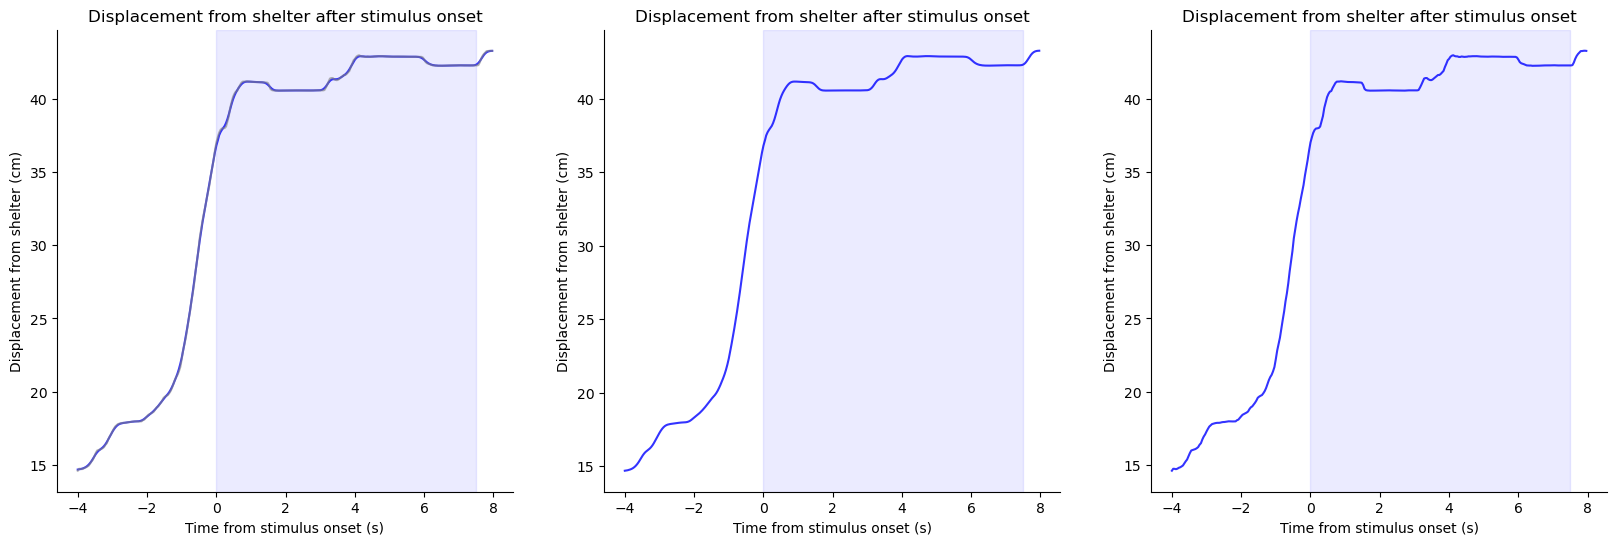

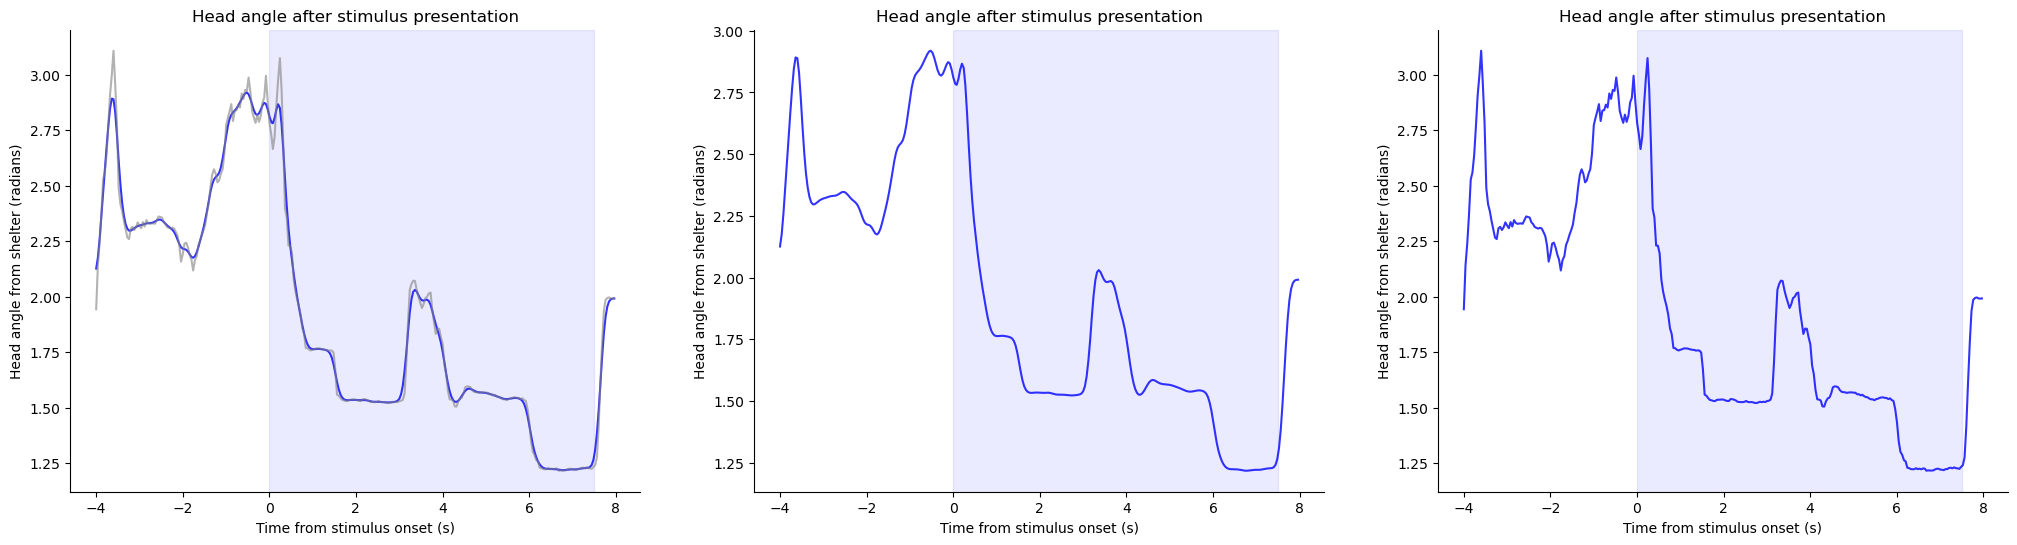

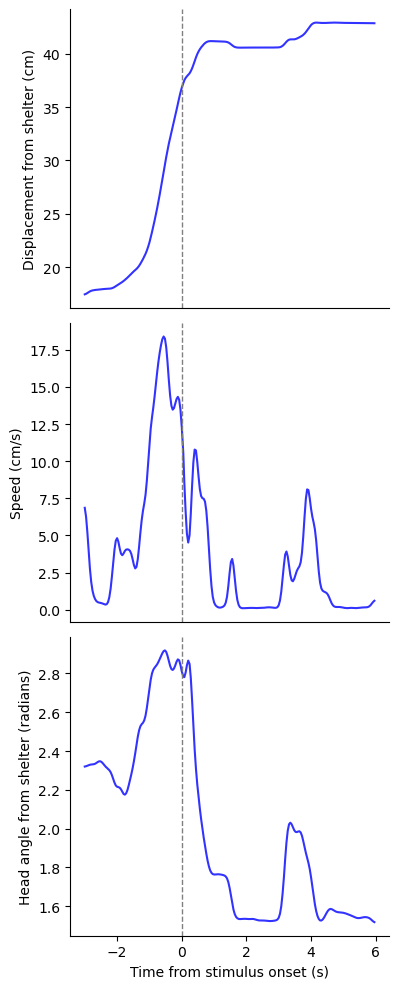

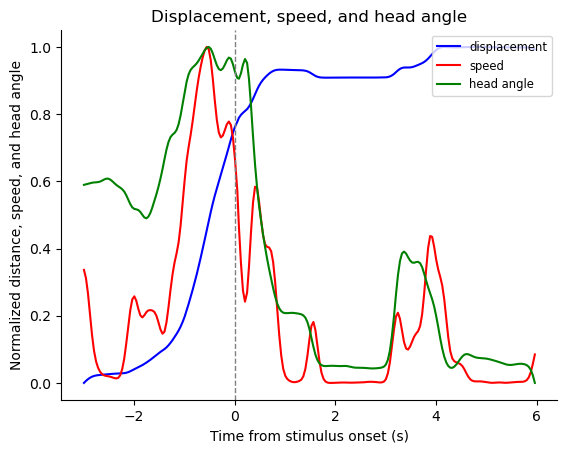

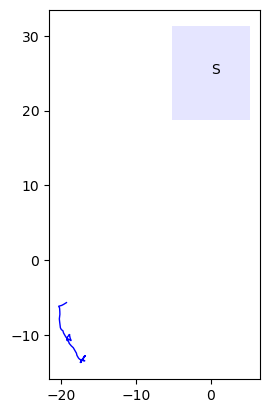

False


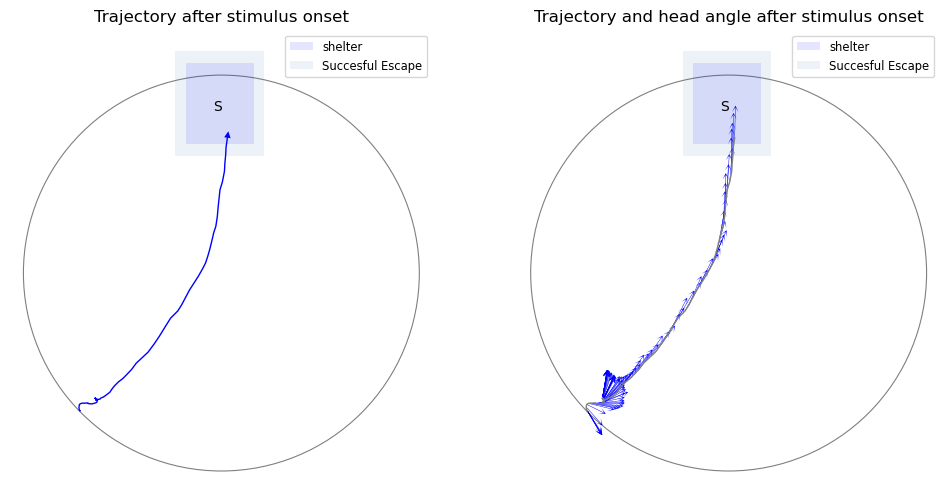

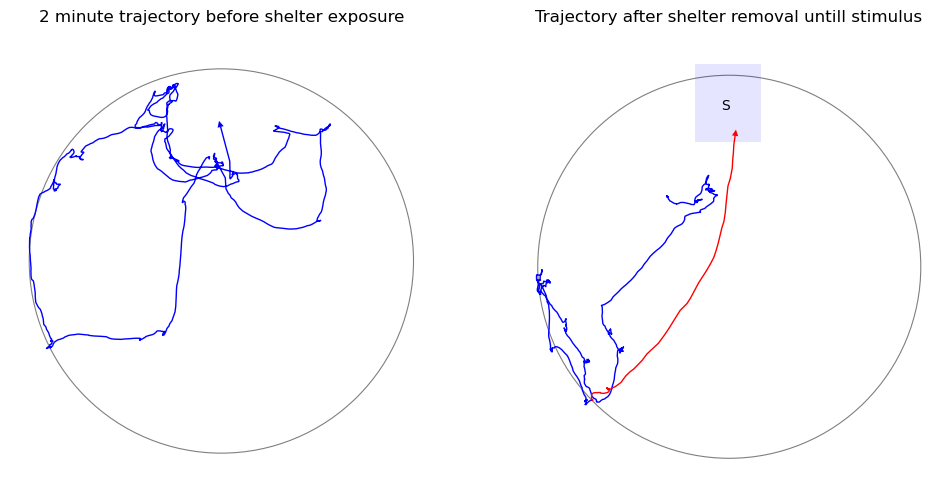

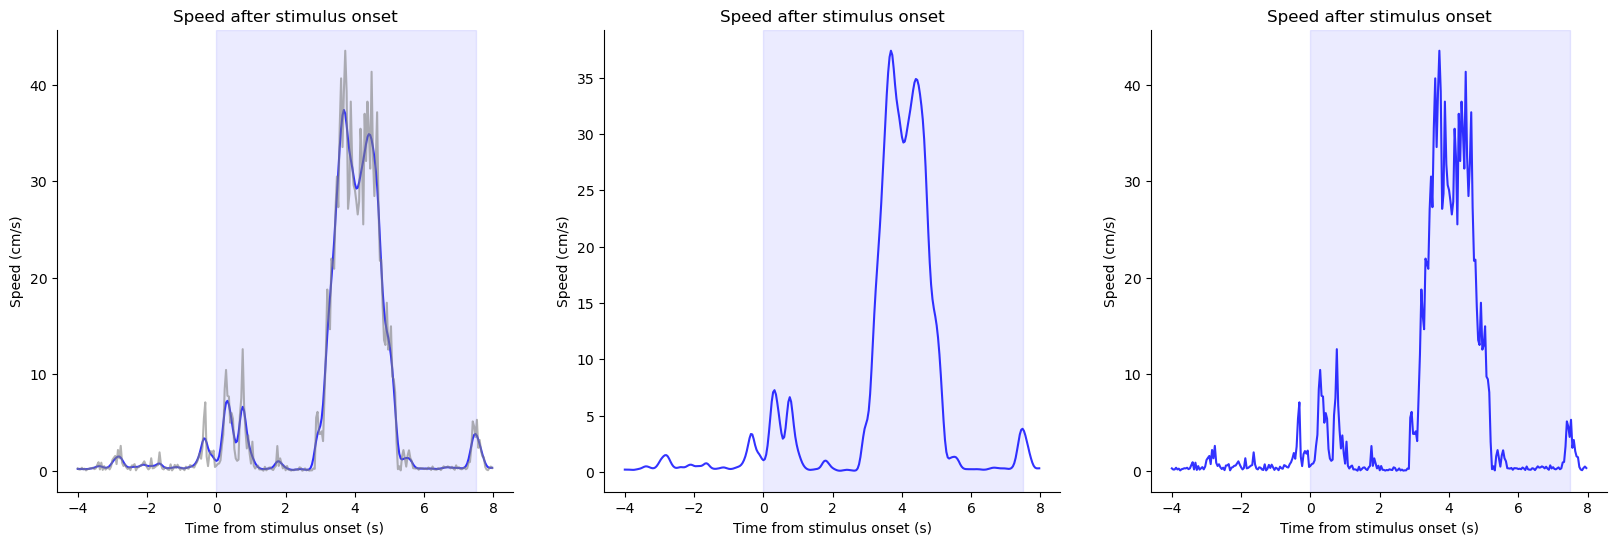

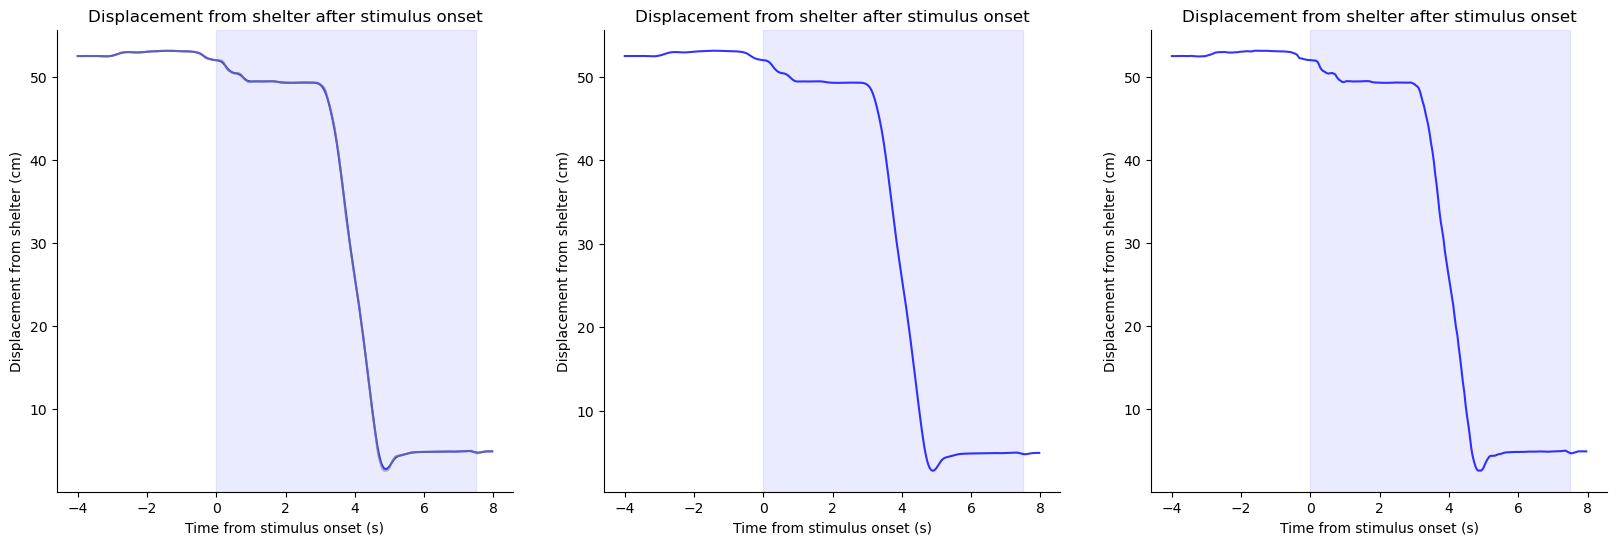

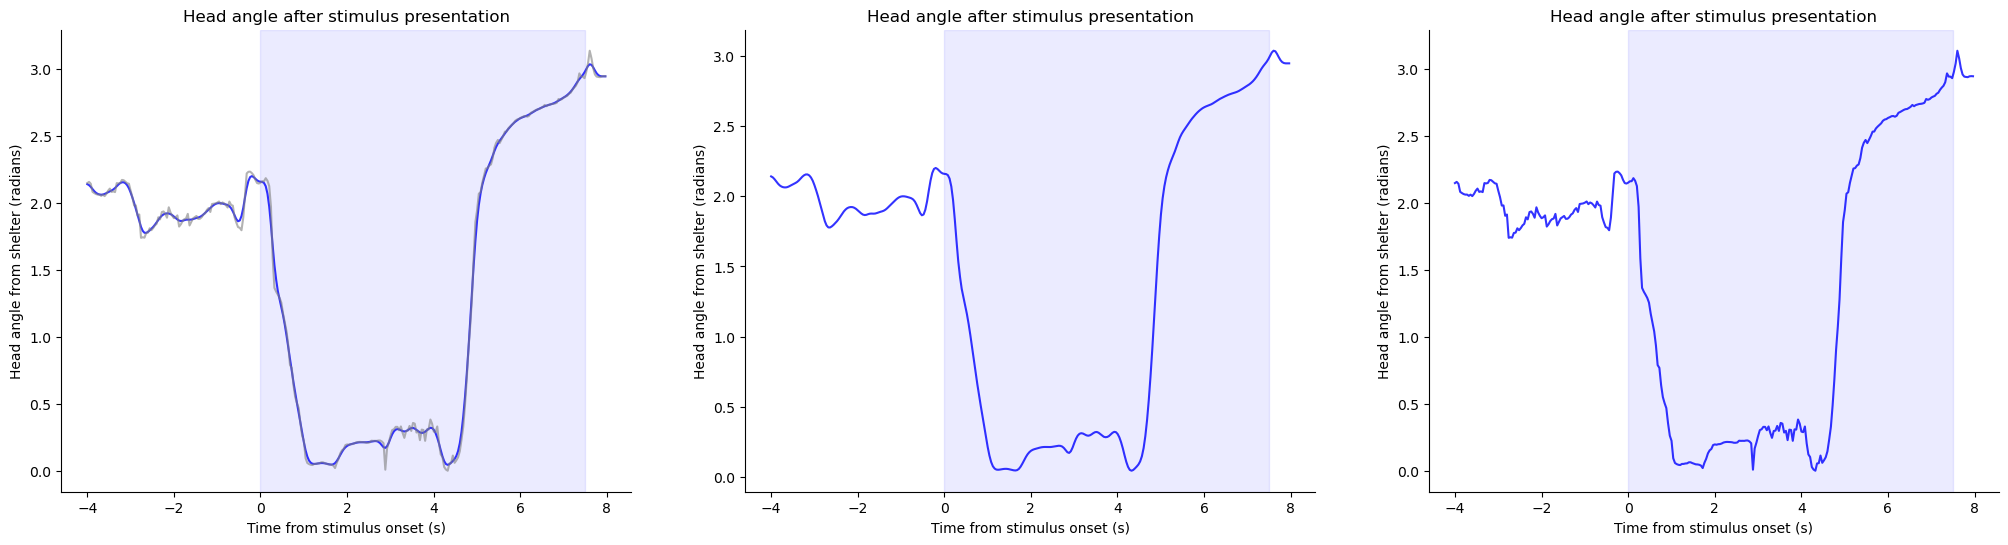

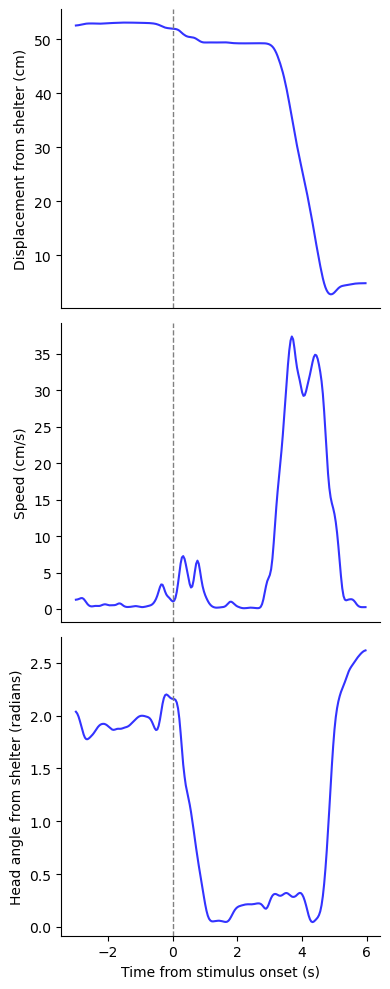

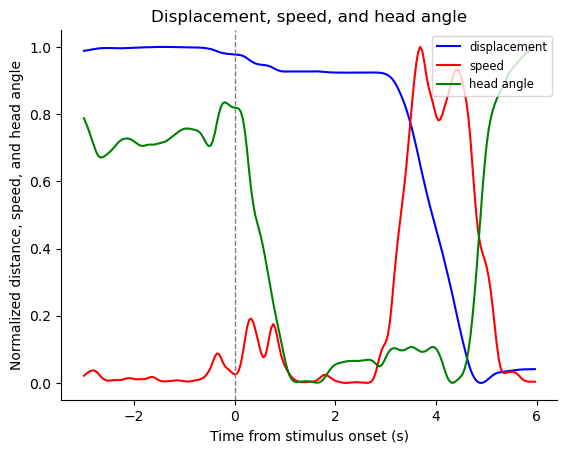

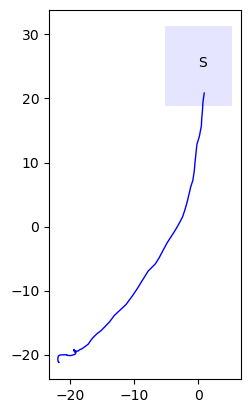

False


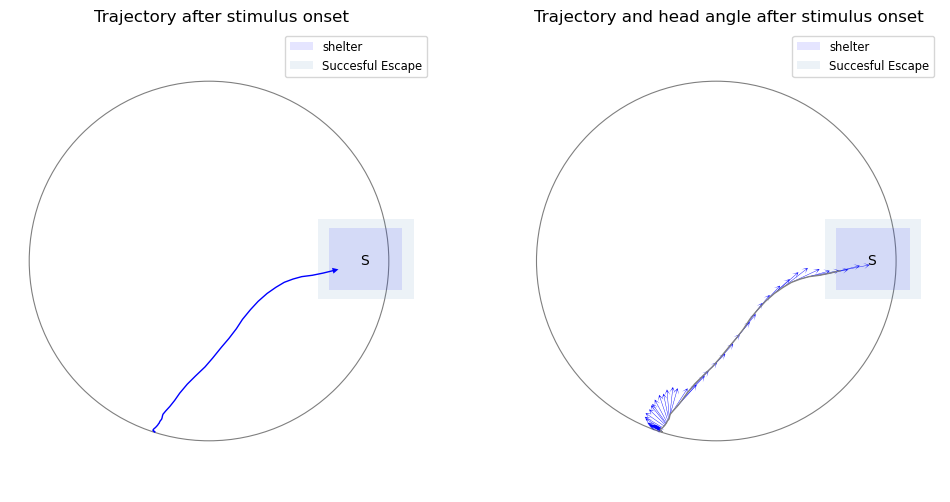

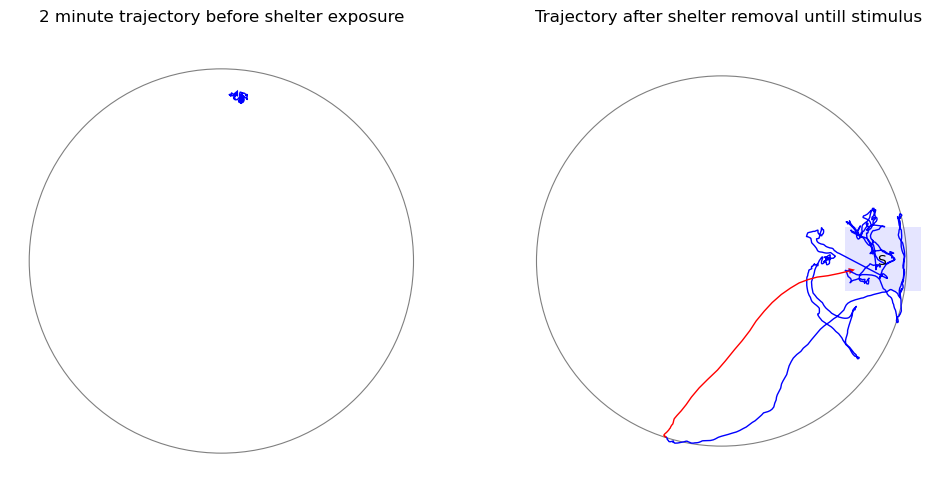

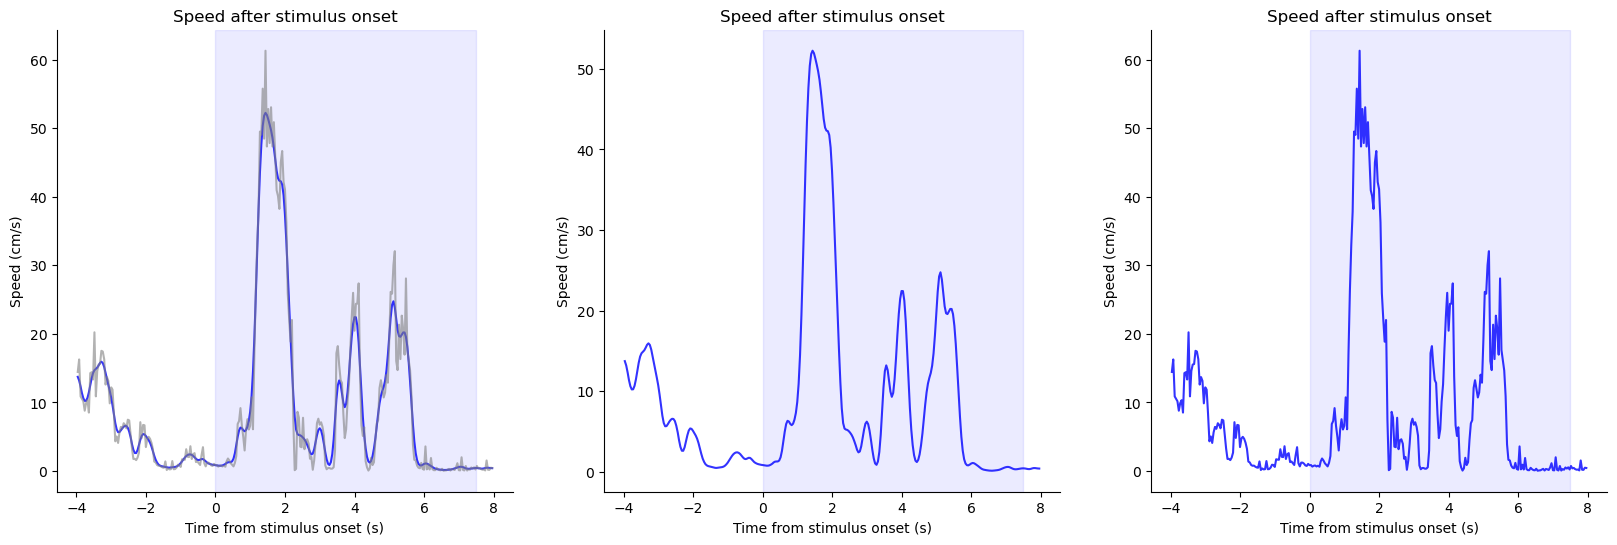

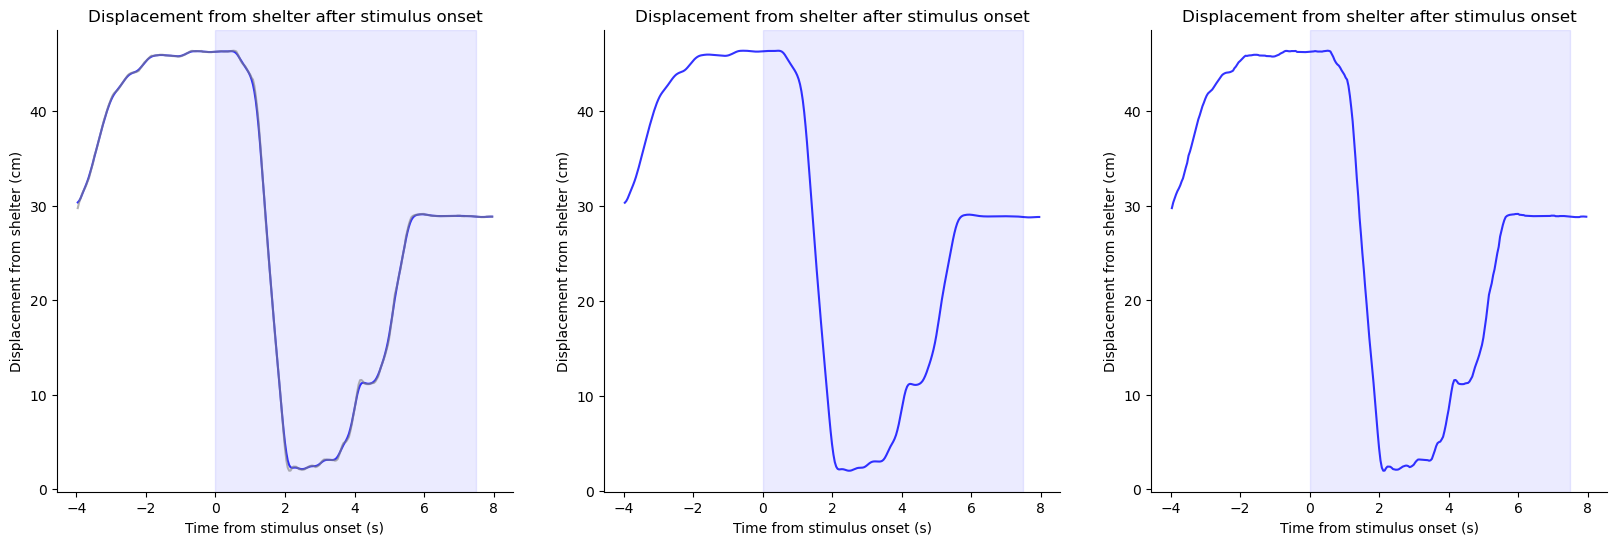

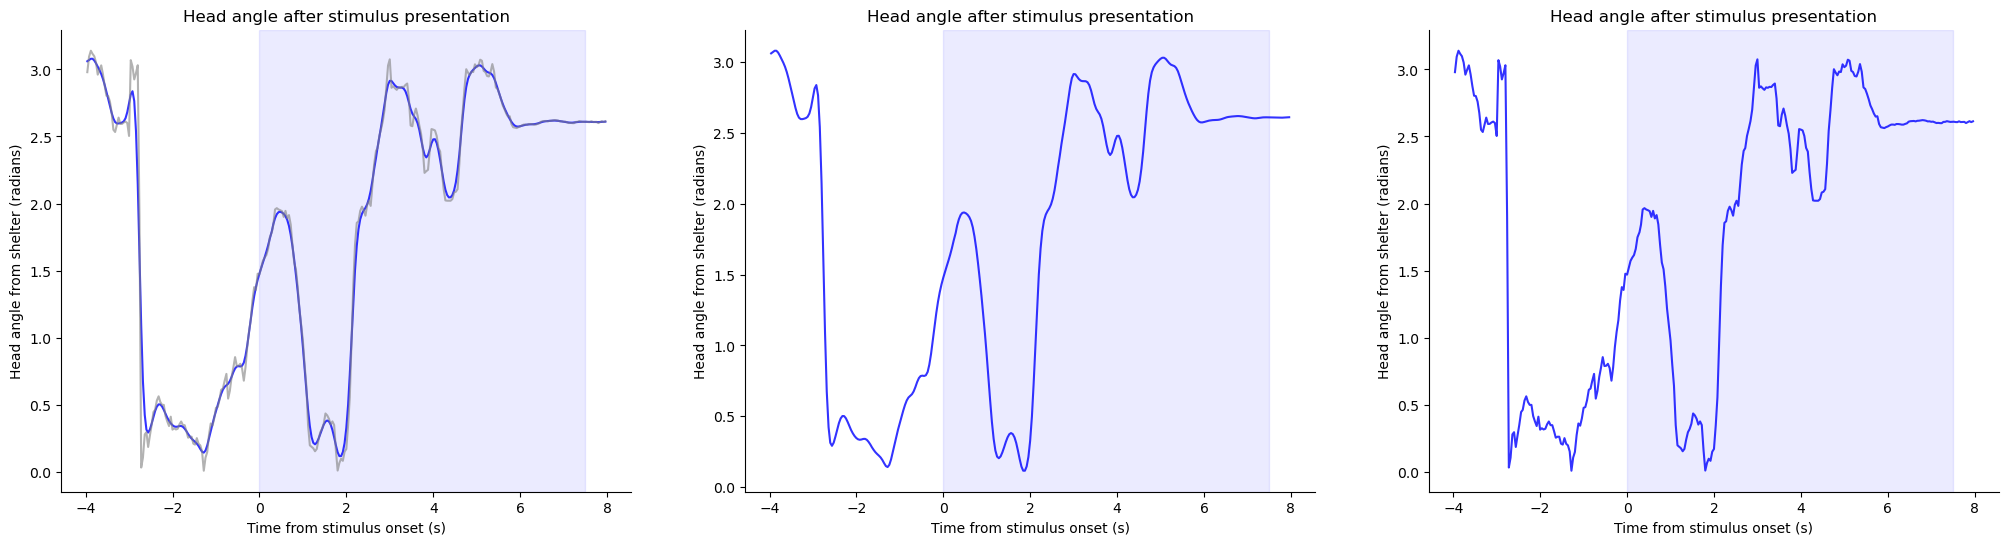

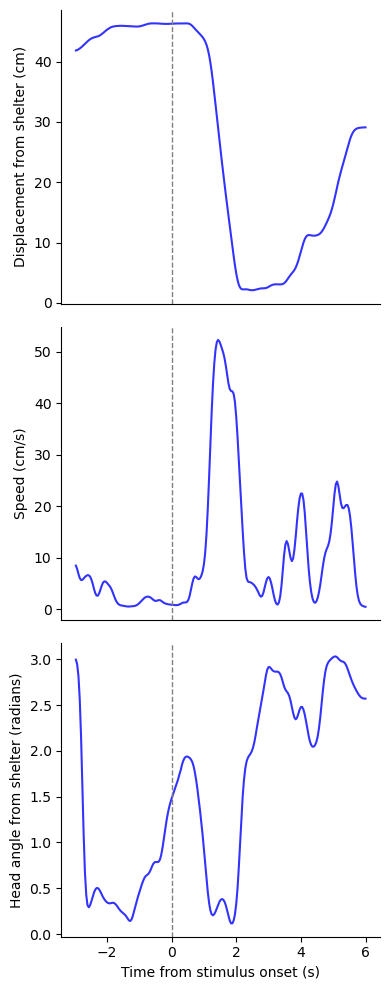

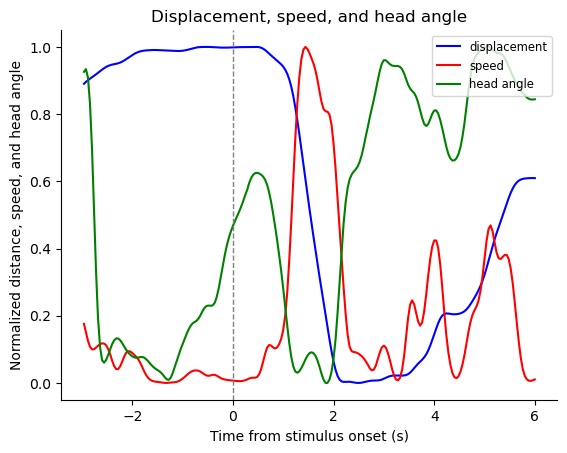

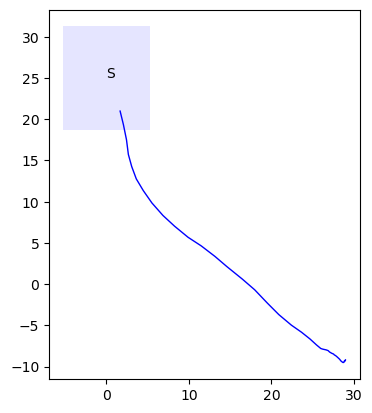

False


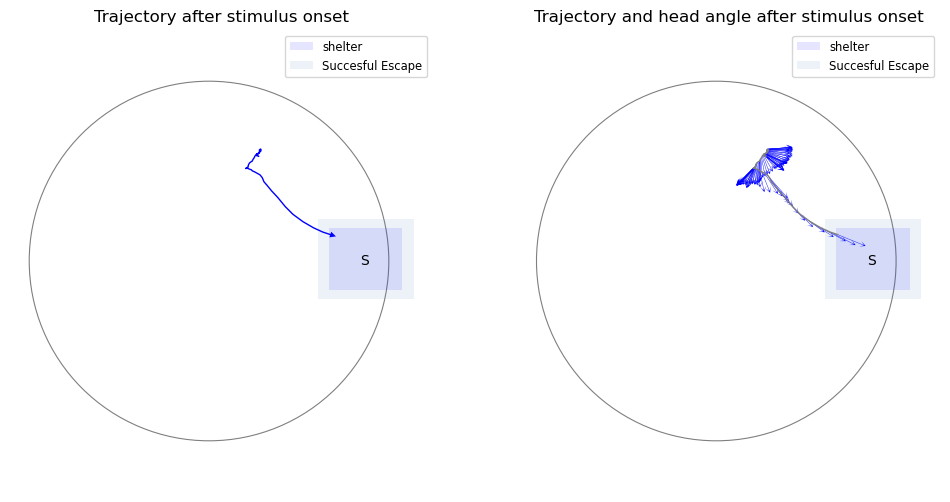

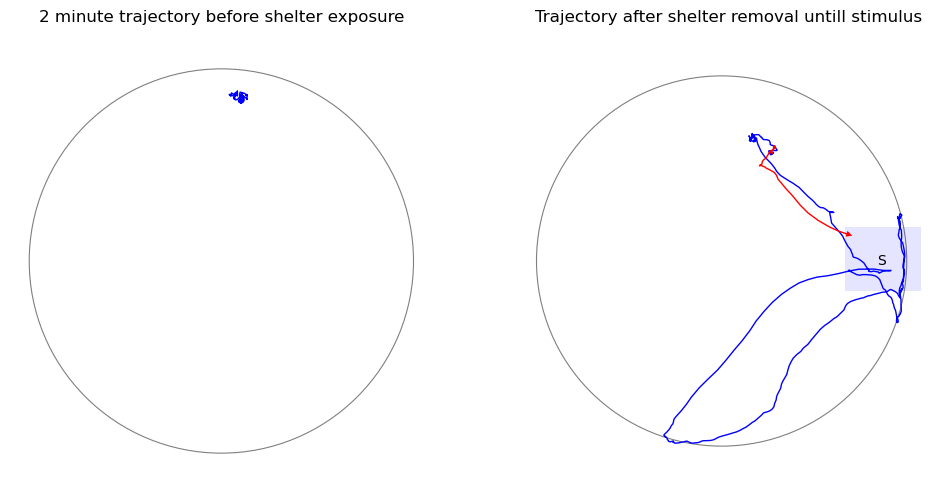

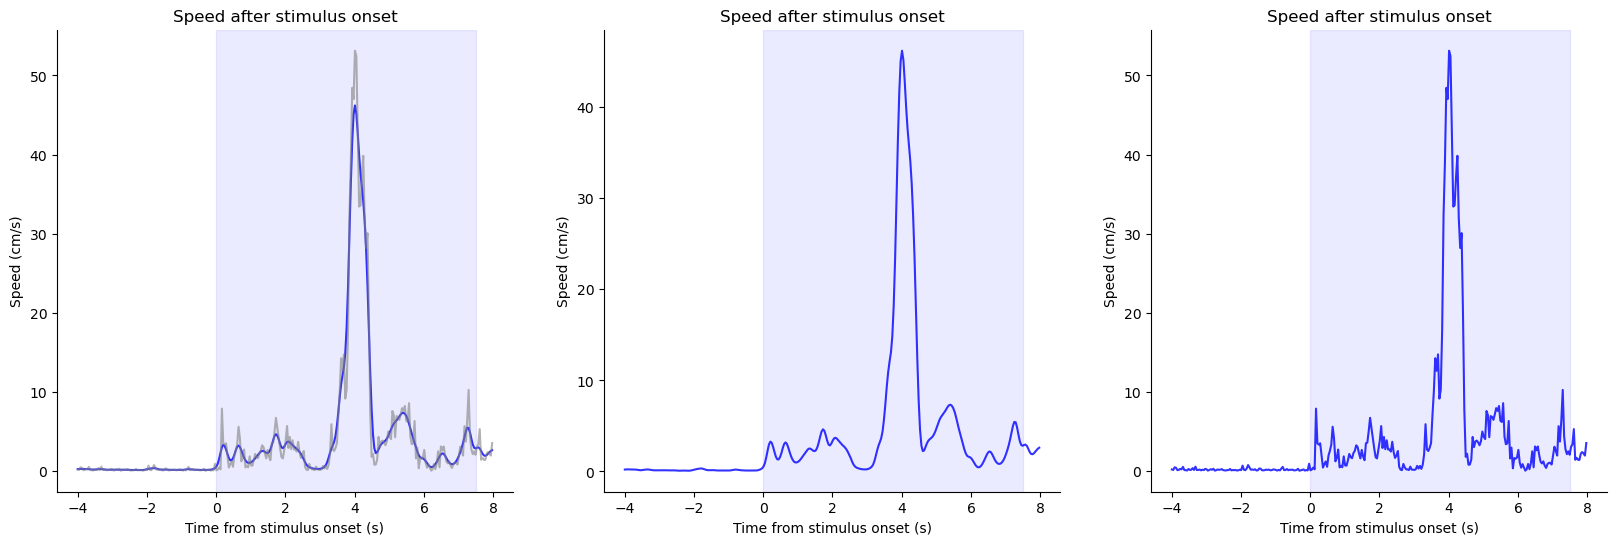

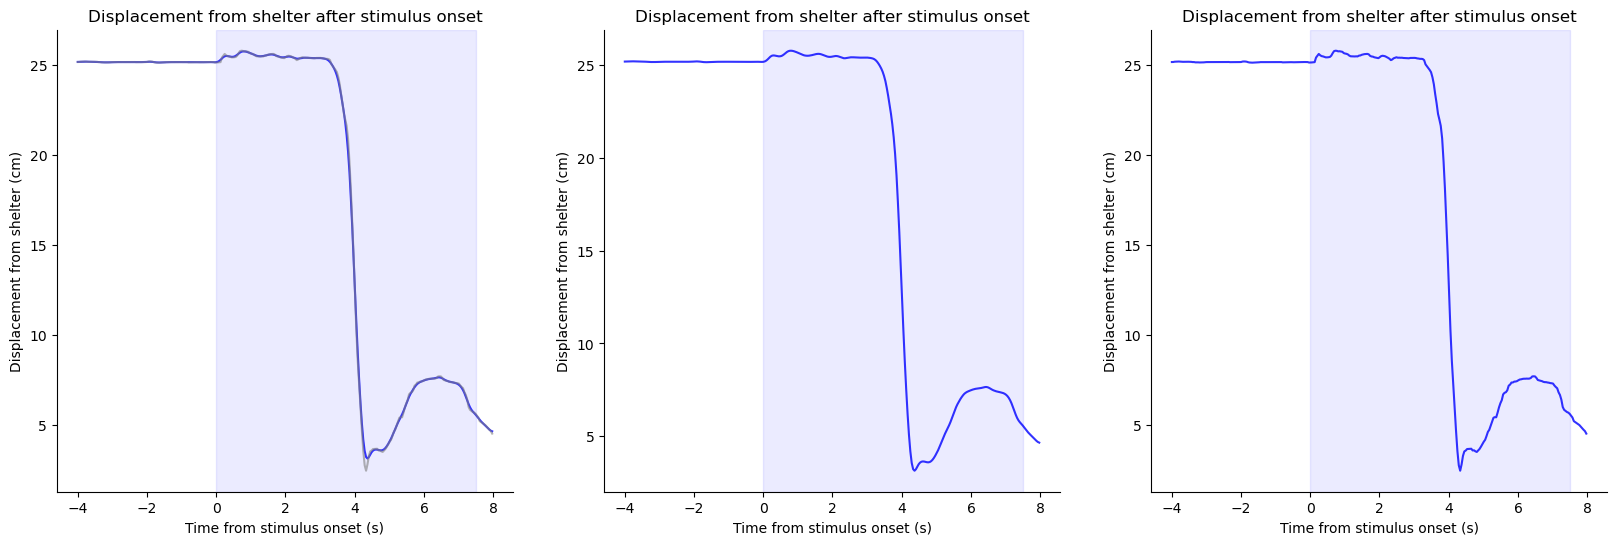

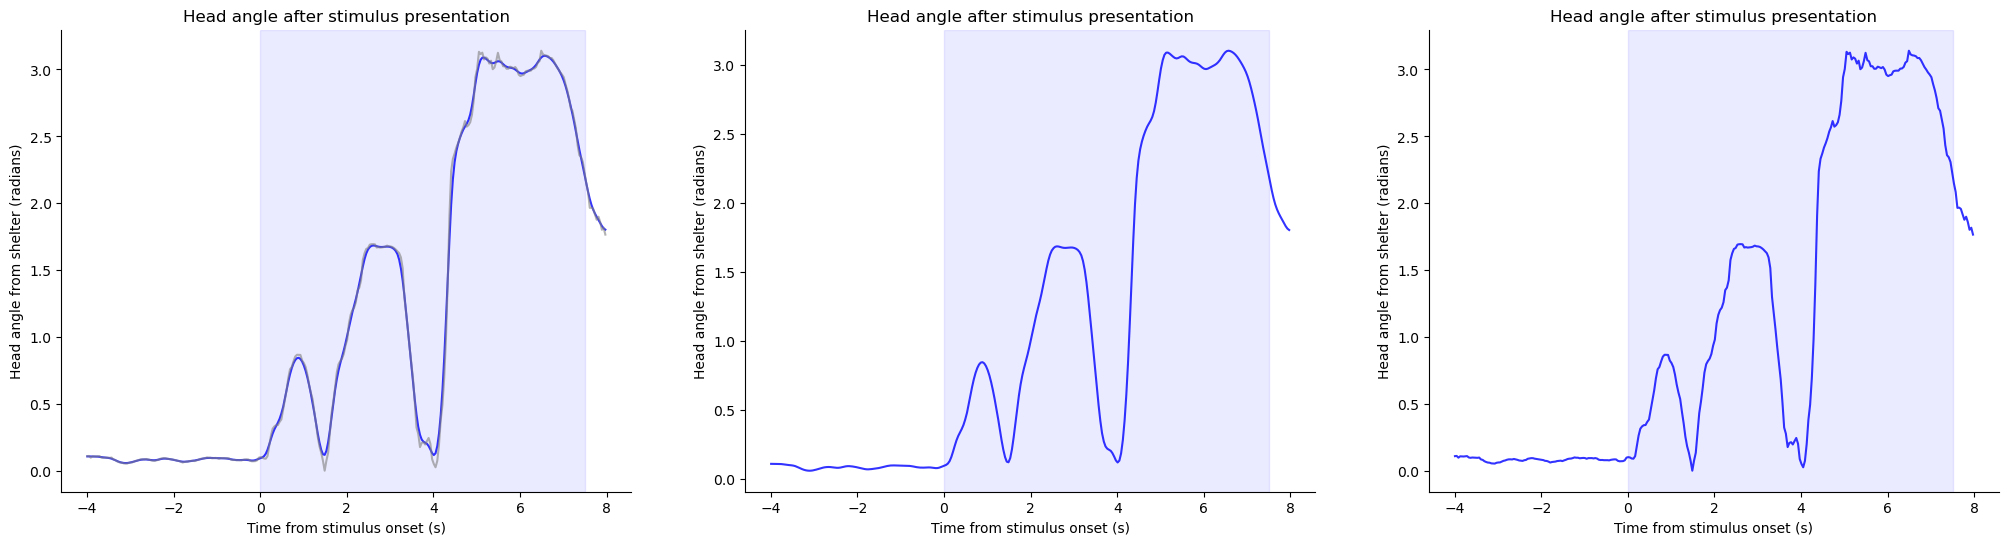

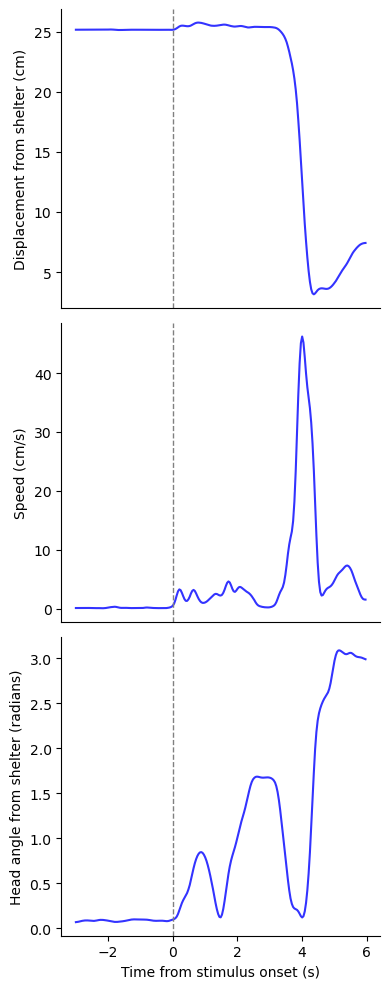

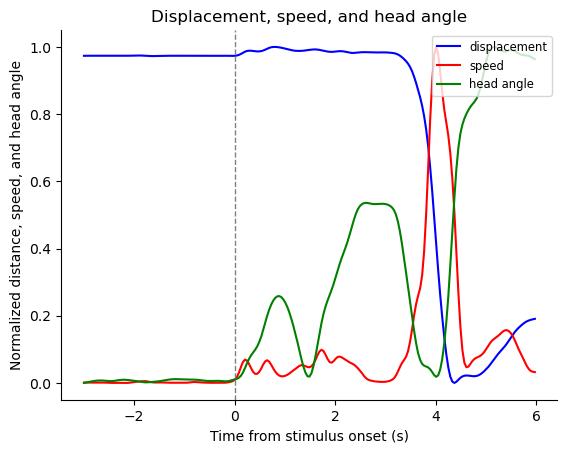

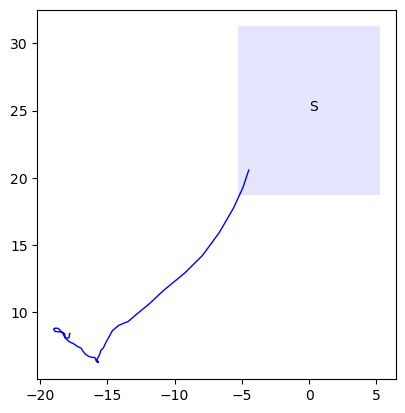

In [2]:
%run D1_compiled_functions.ipynb

False


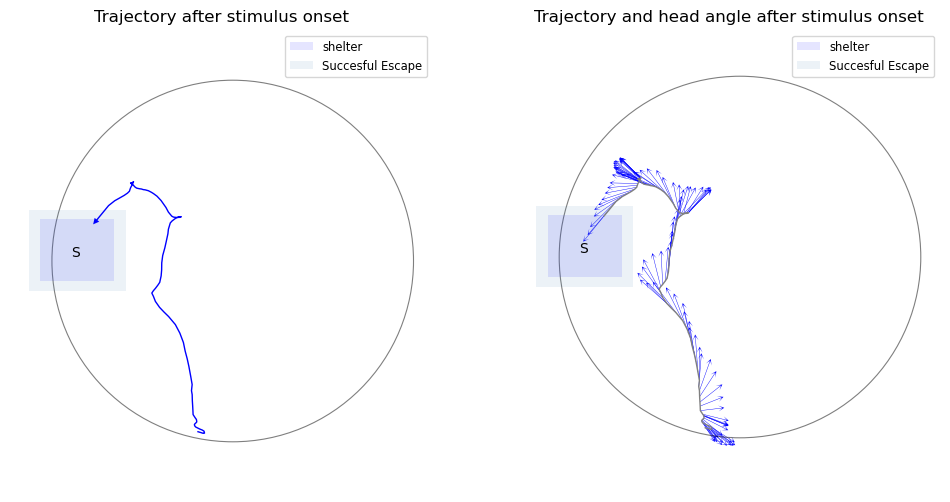

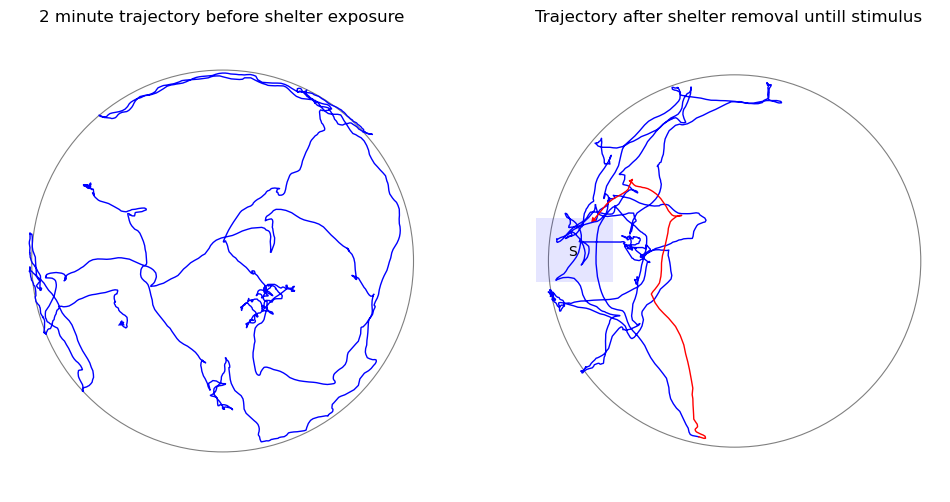

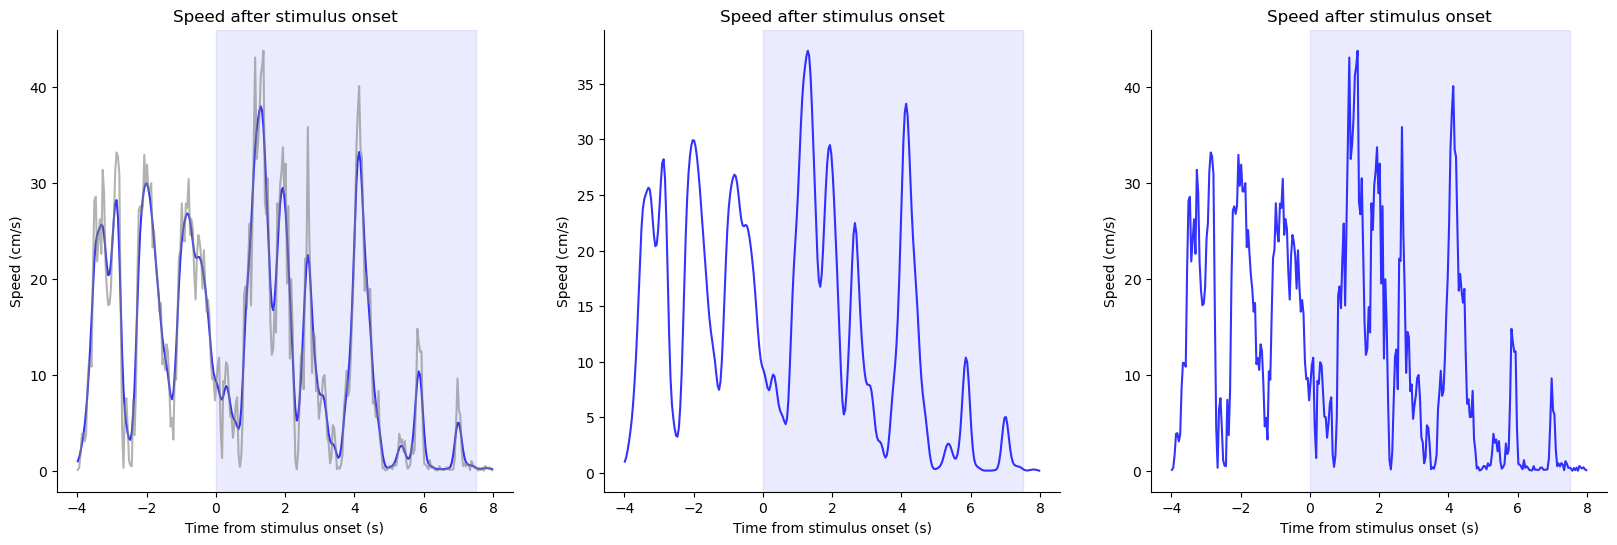

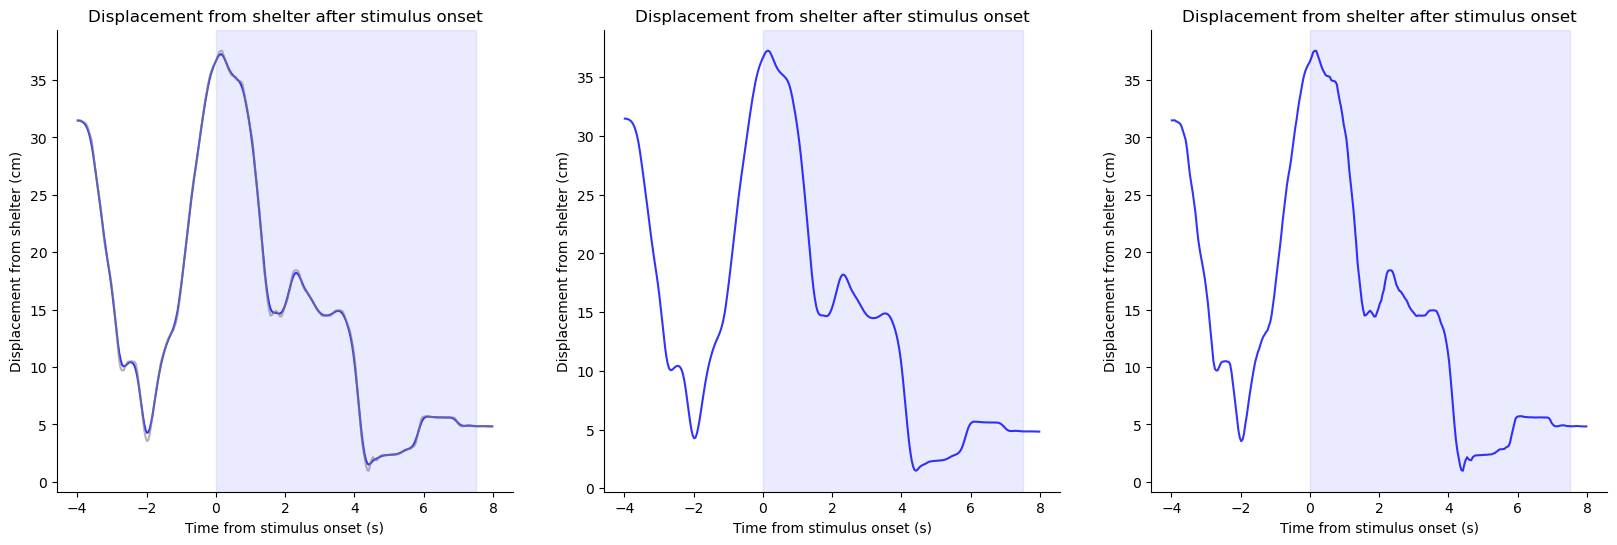

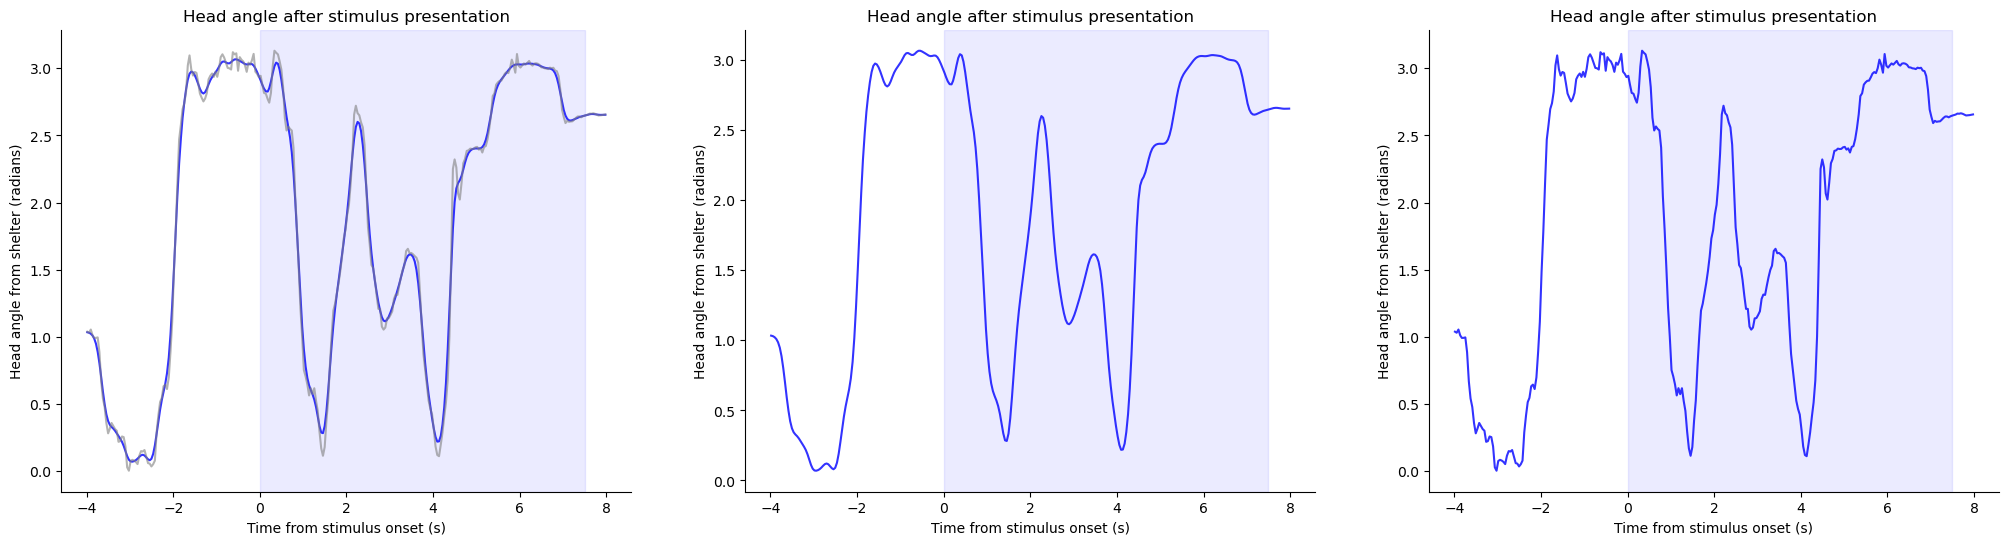

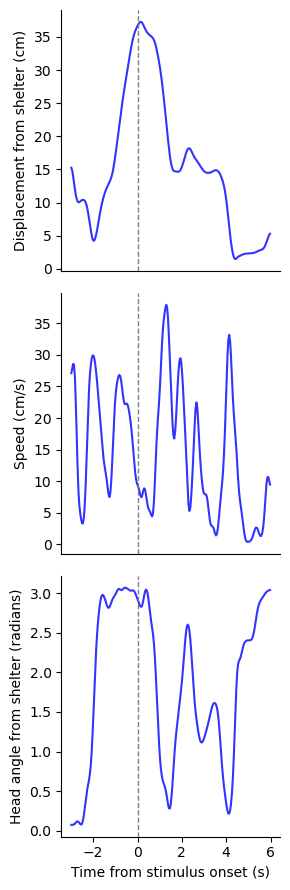

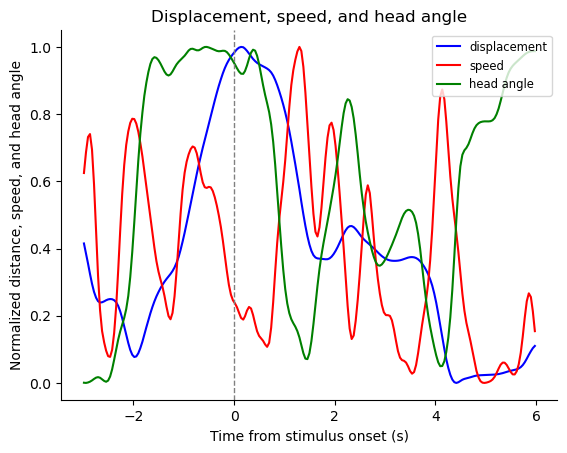

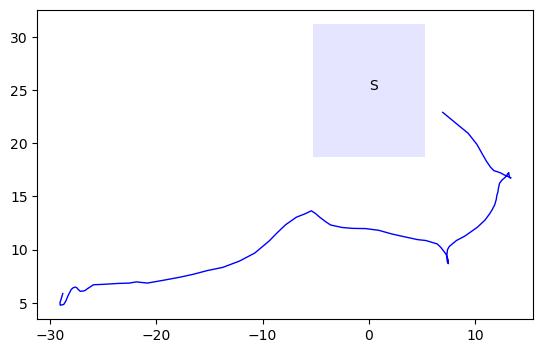

False


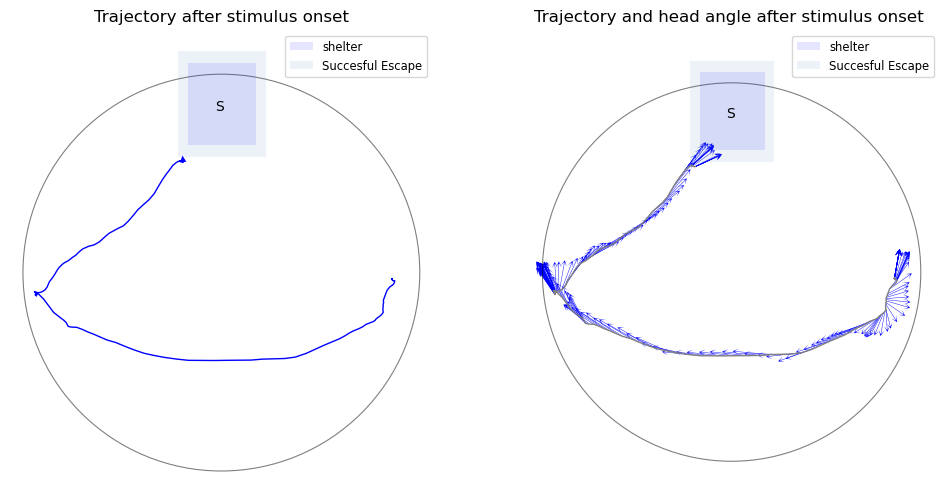

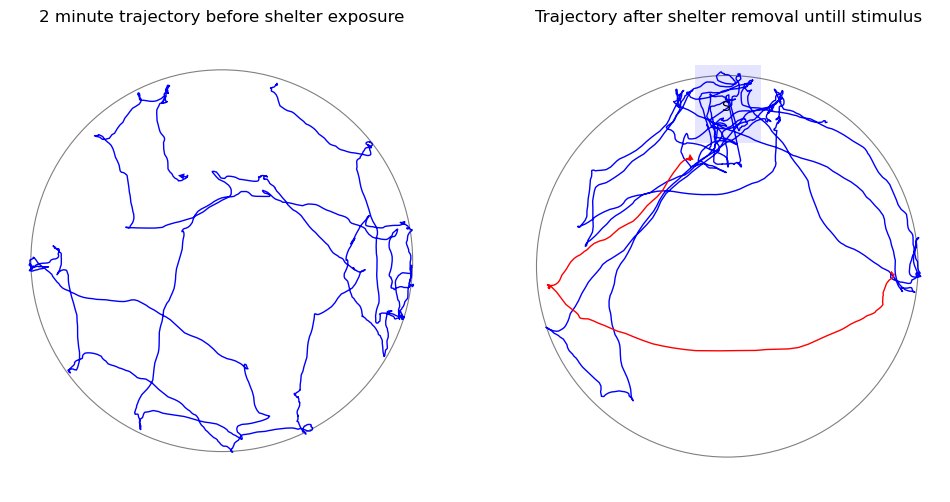

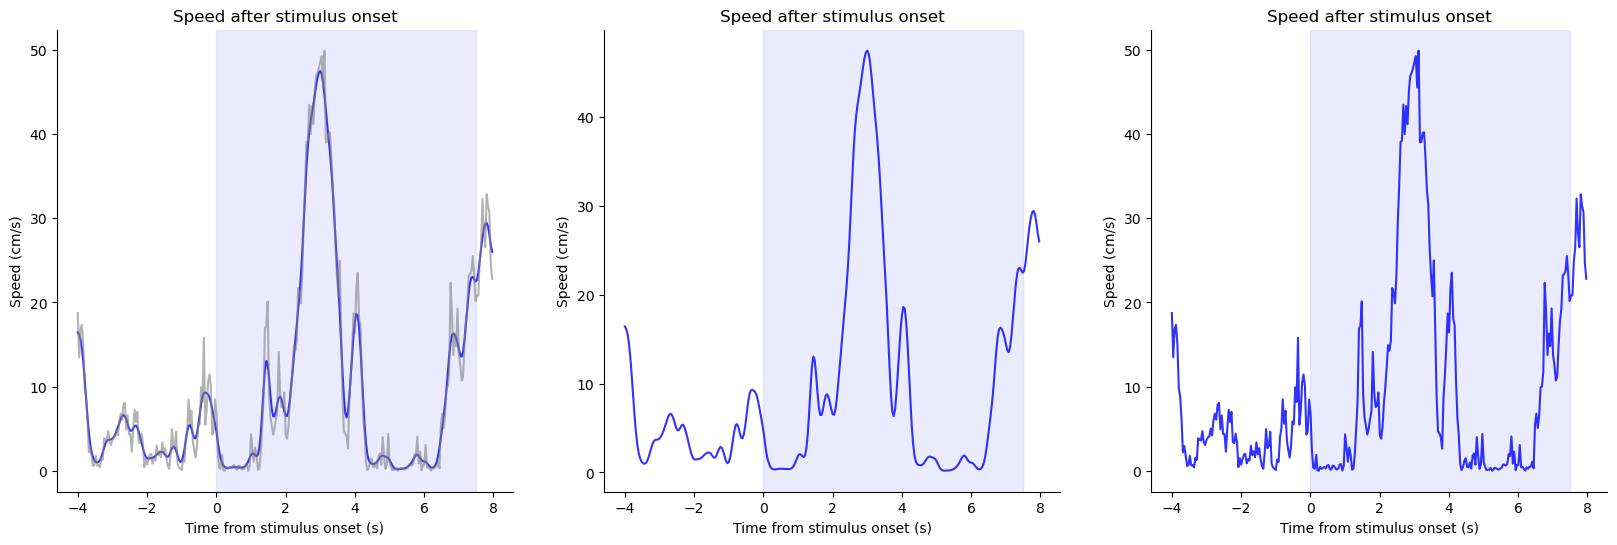

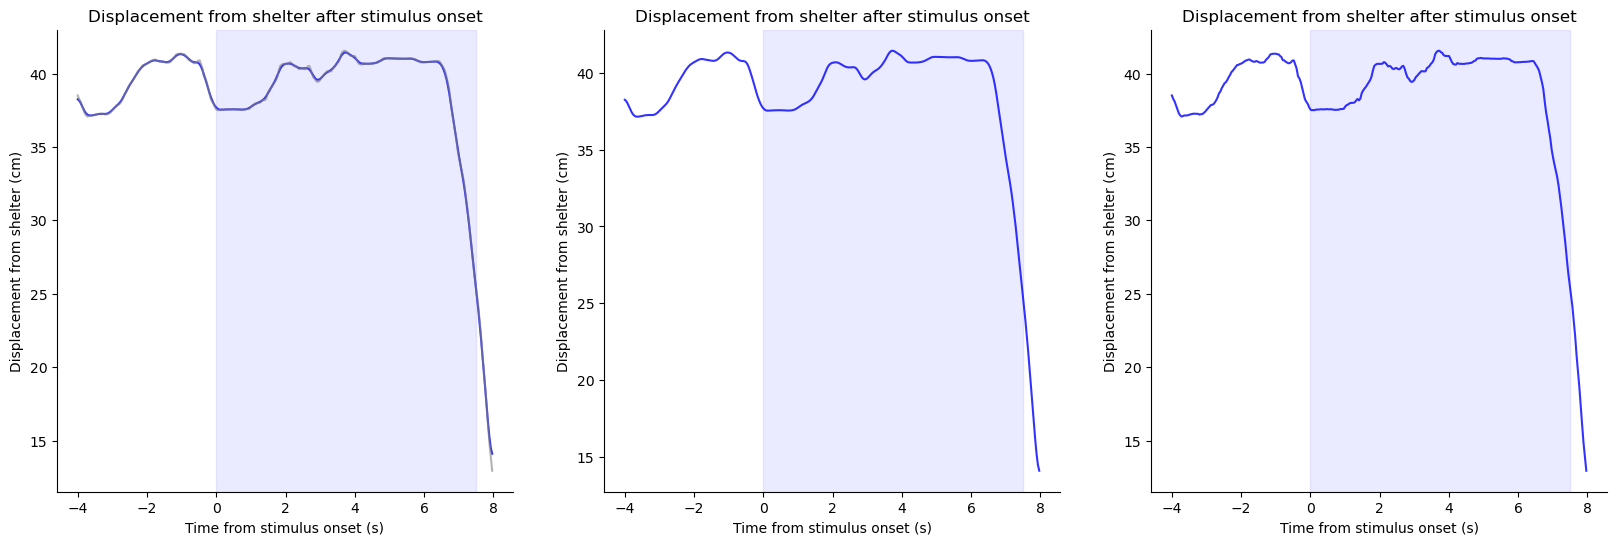

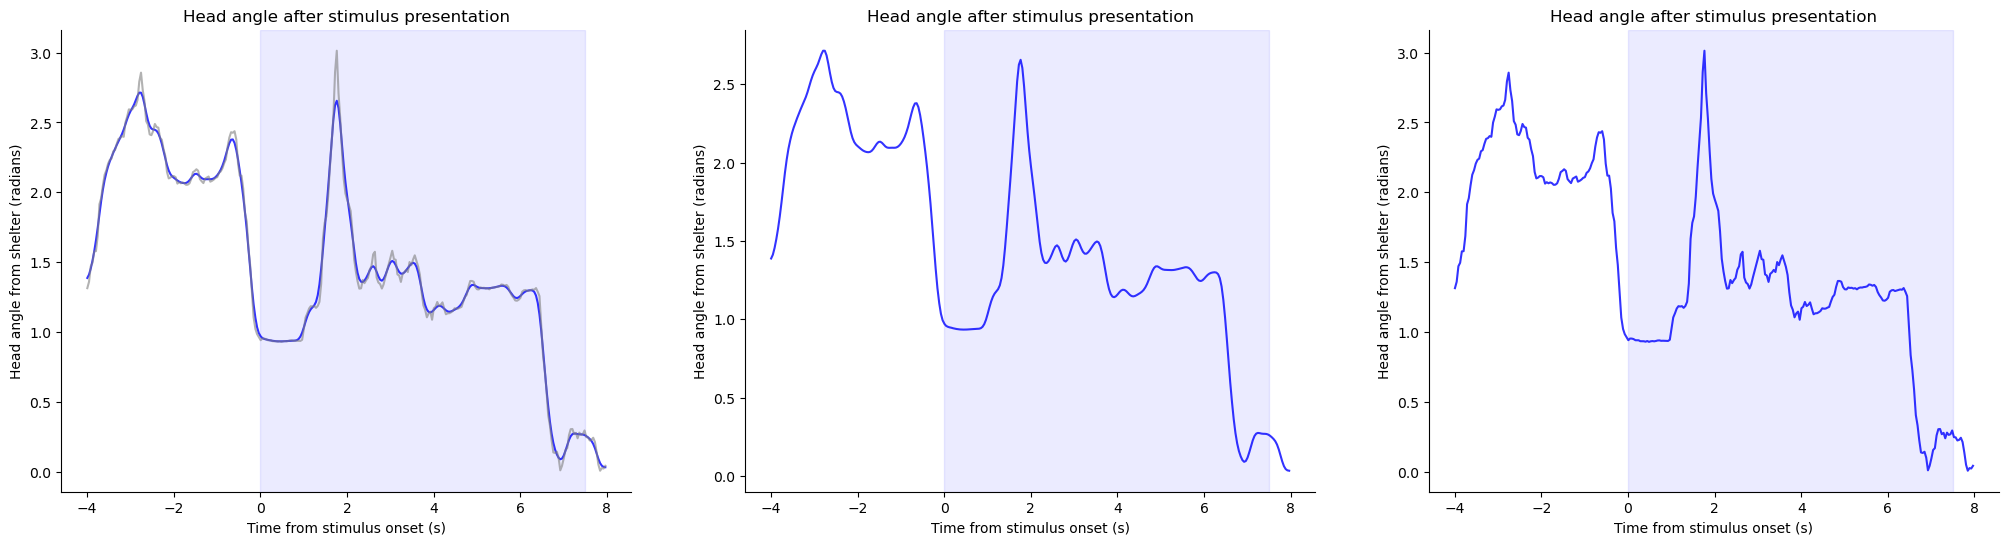

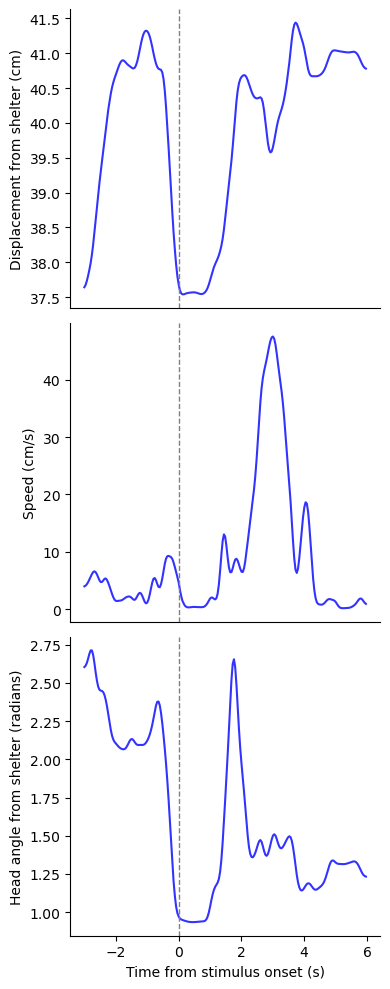

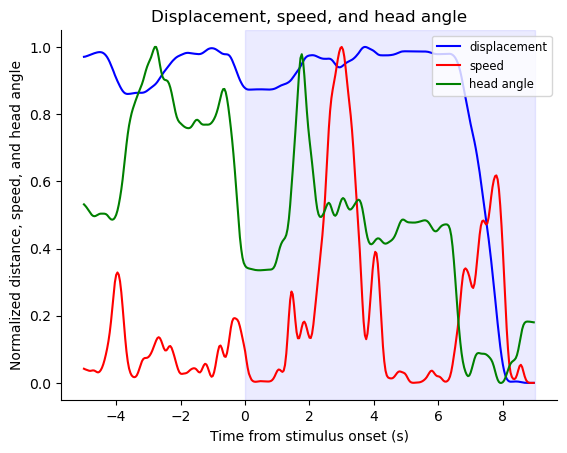

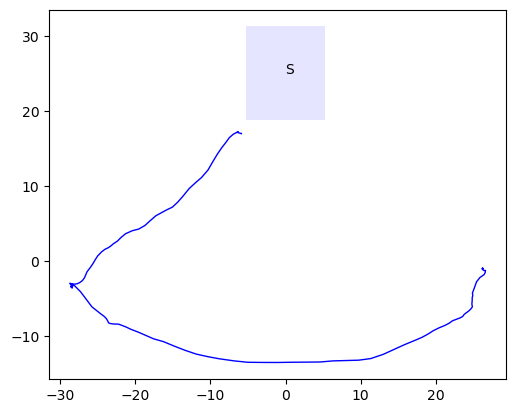

False


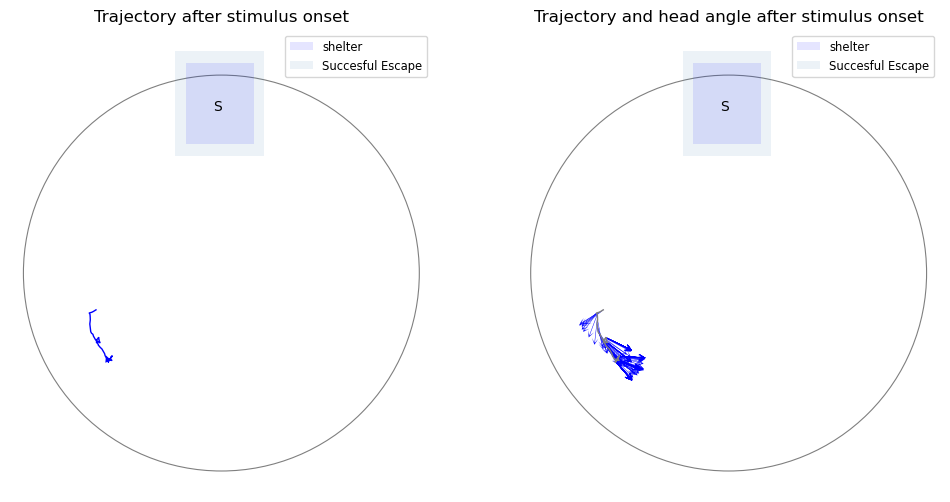

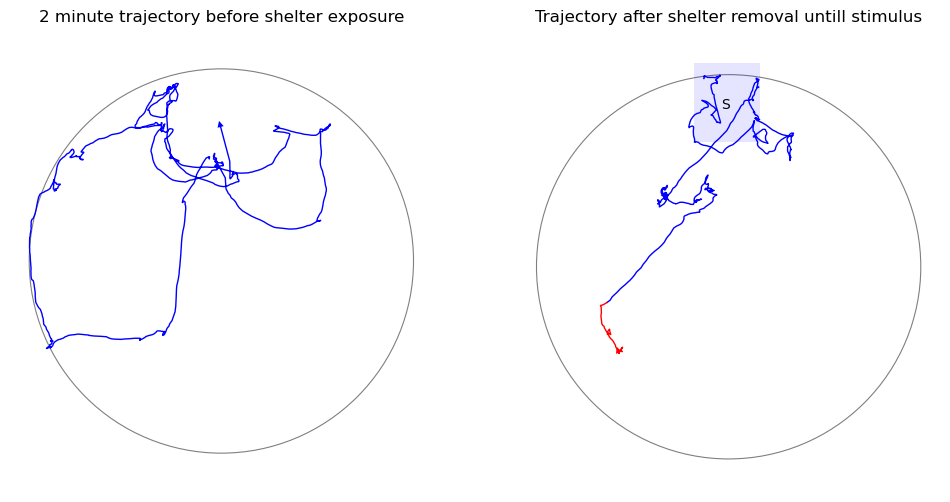

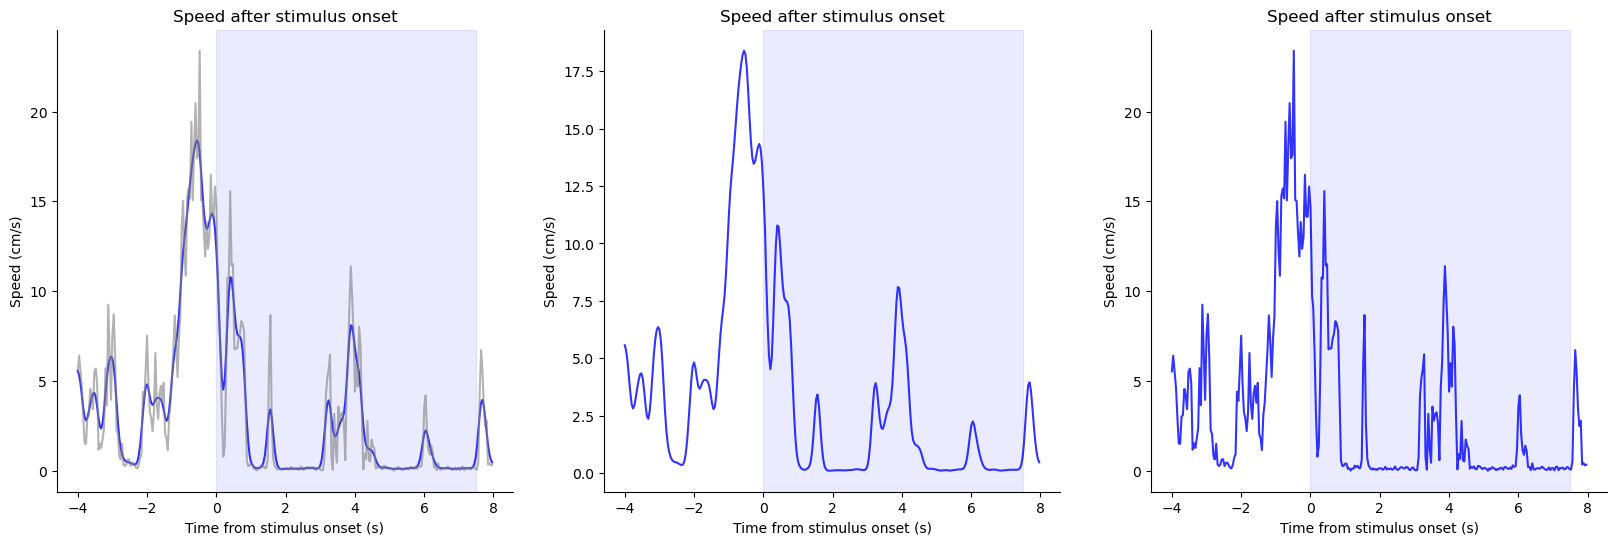

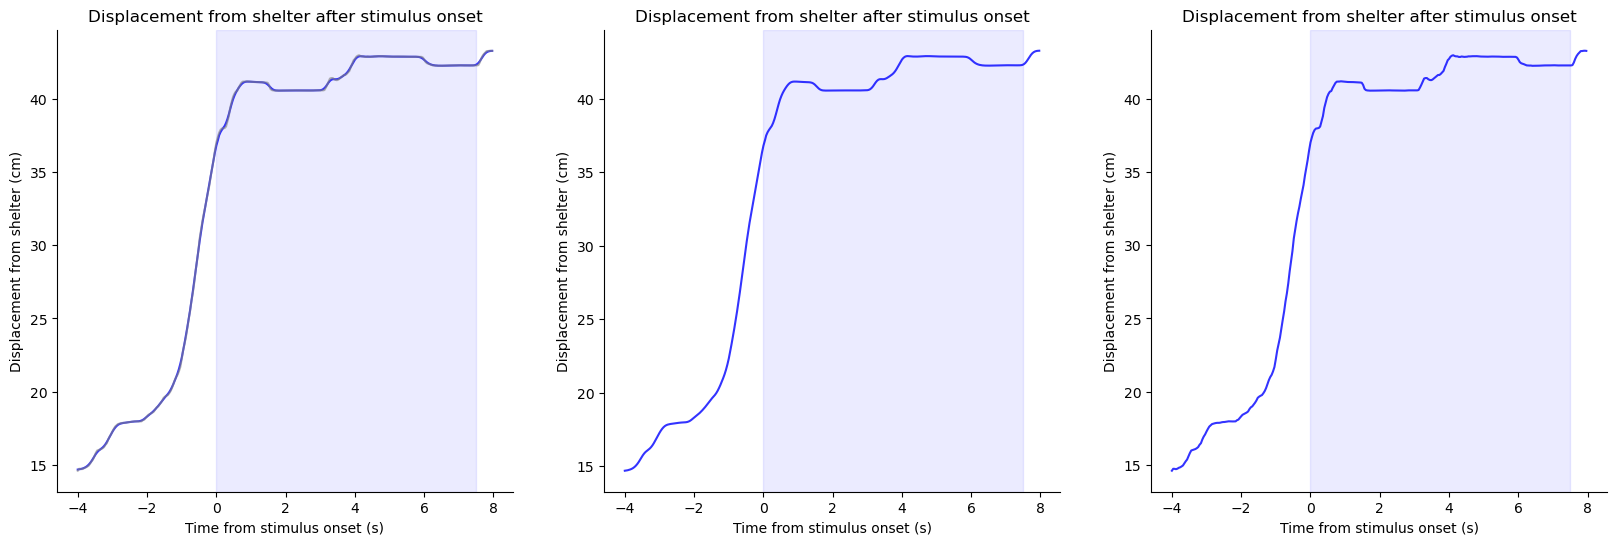

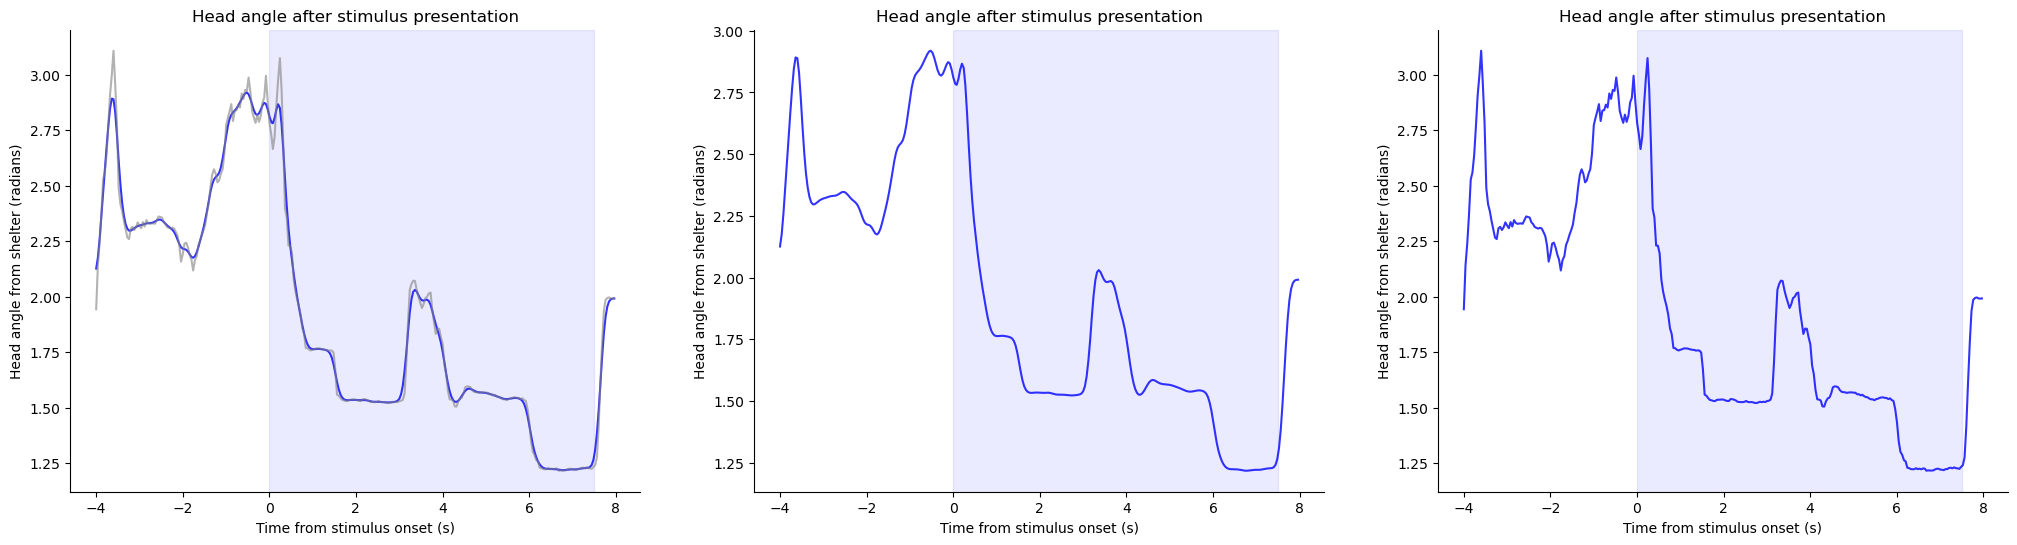

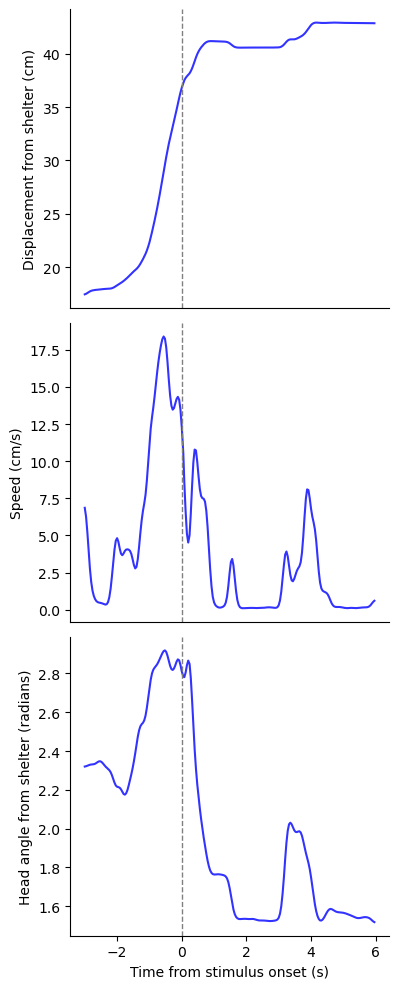

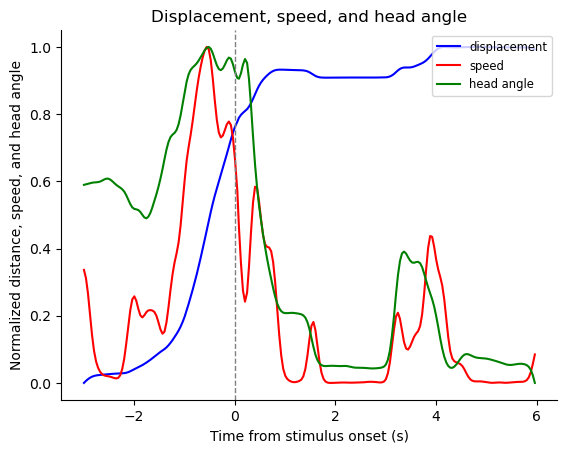

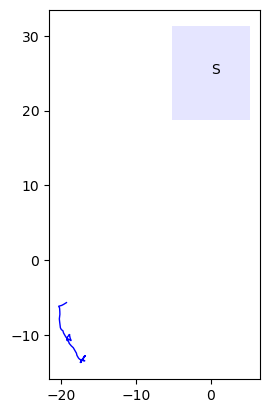

False


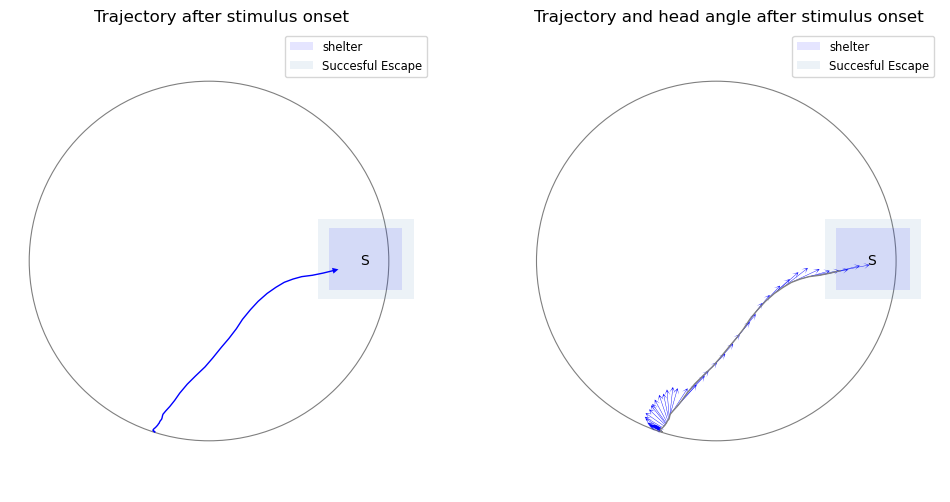

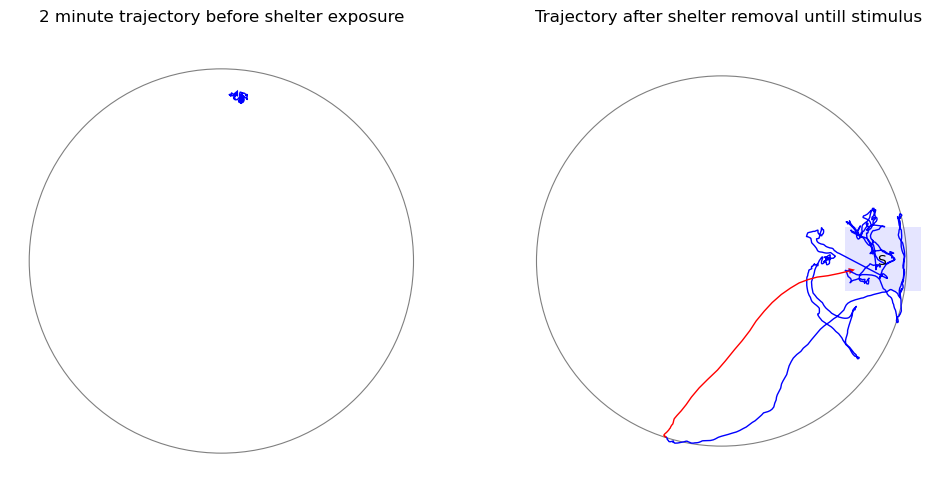

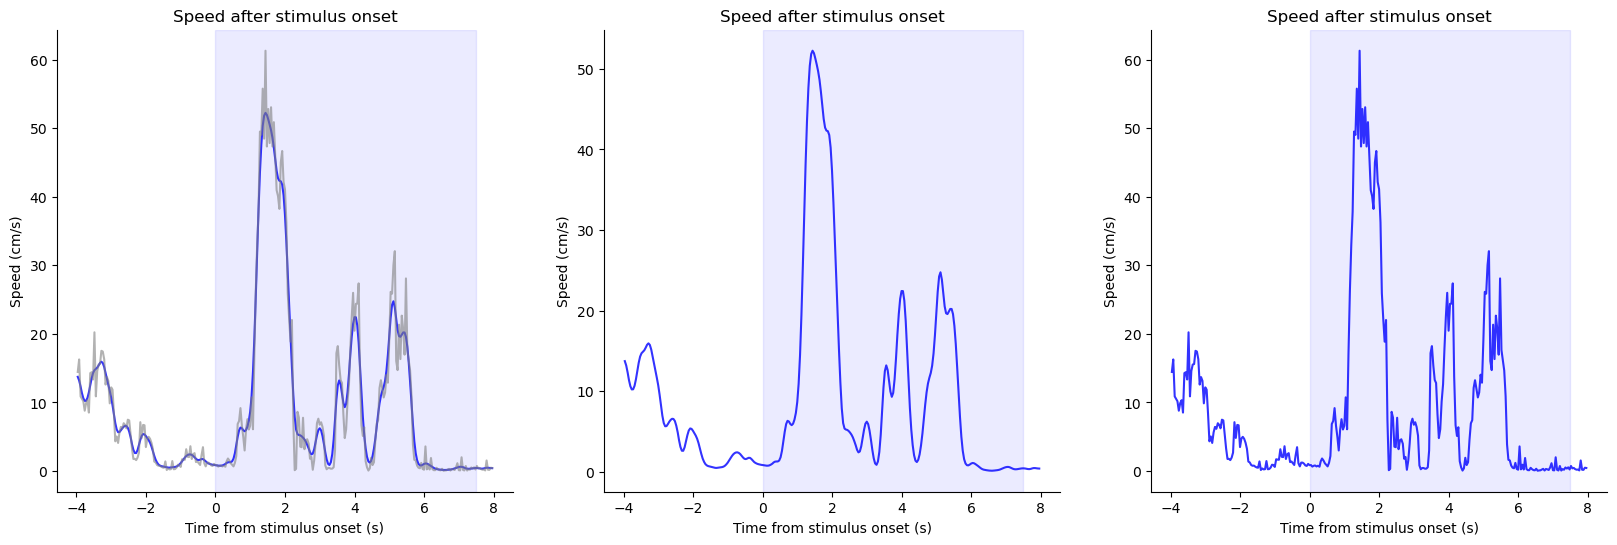

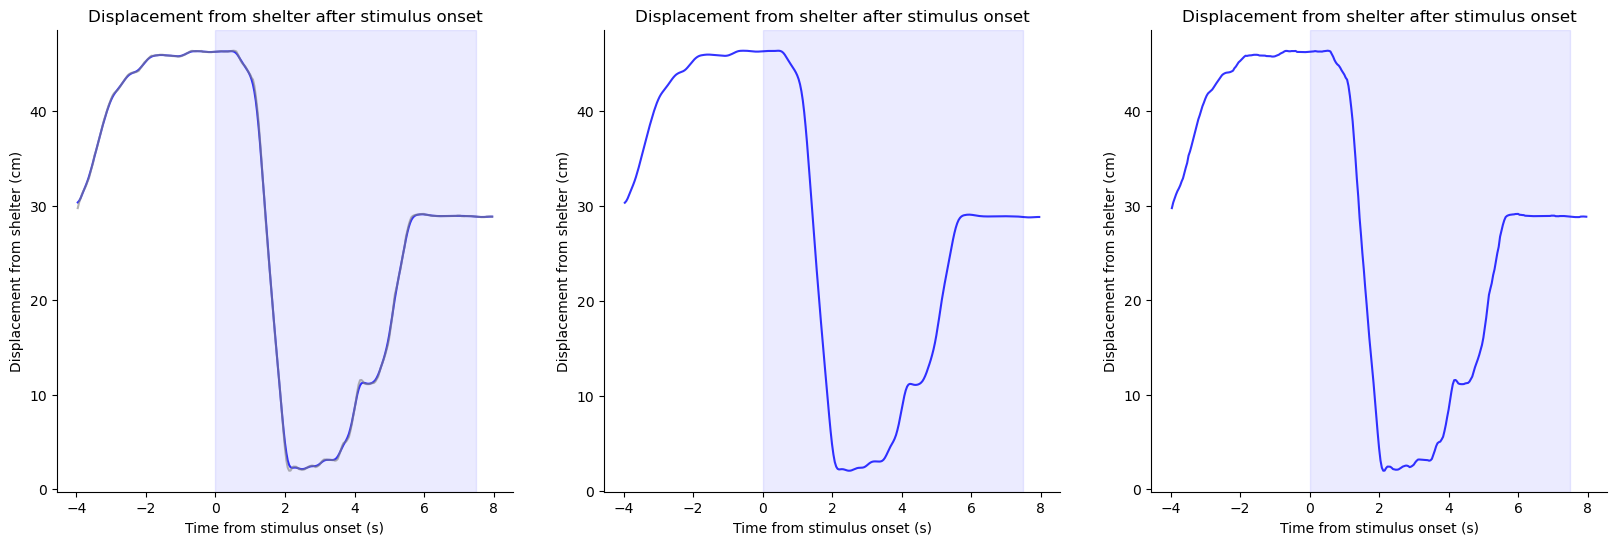

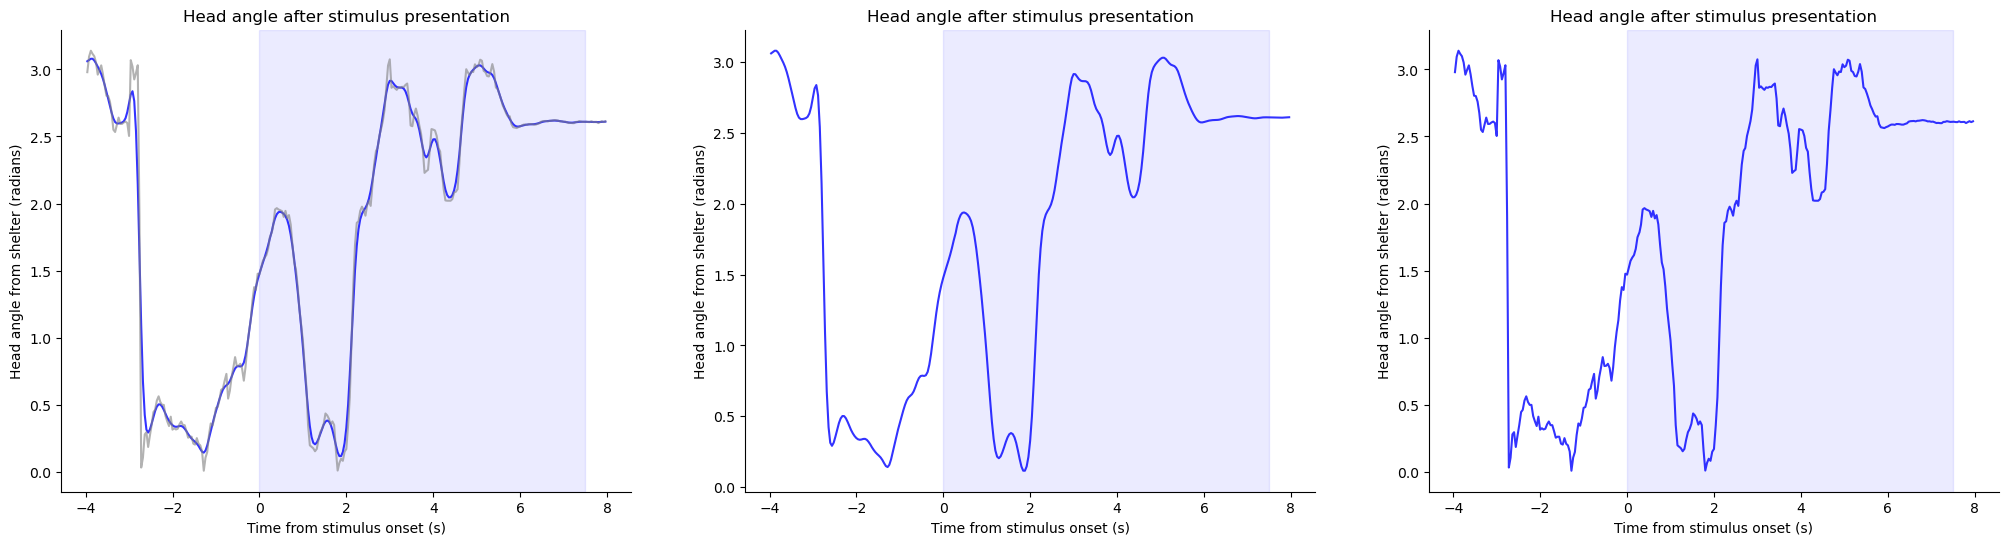

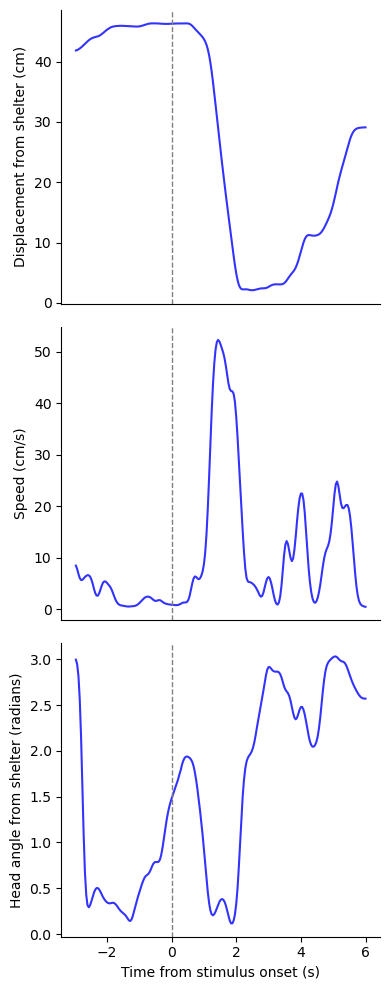

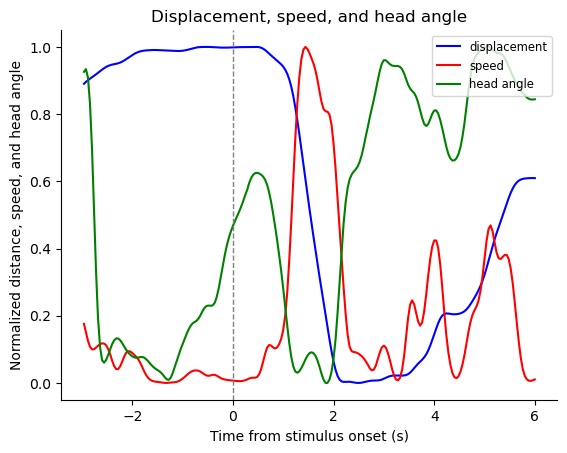

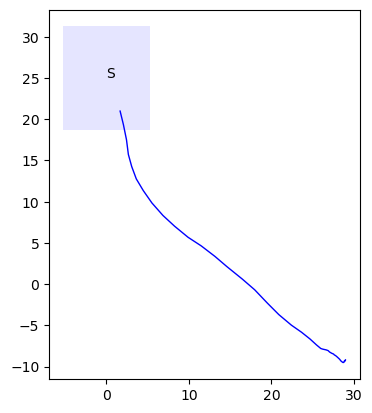

In [3]:
%run D1_mouse_graphing_functions.ipynb

%run D1_M1.ipynb
M1_coord_scaled = coord_scaled
M1_initial_displacement = initial_displacement
M1_total_distance = total_distance
M1_shelter_x = shelter_x
M1_shelter_y = shelter_y
M1_shelter_rotate_x = shelter_rotate_x
M1_shelter_rotate_y = shelter_rotate_y
M1_rotate = rotate
M1_coord_scaled_smooth = coord_scaled_smooth

%run D1_M2_stimulus1.ipynb
M2_coord_scaled = coord_scaled
M2_initial_displacement = initial_displacement
M2_total_distance = total_distance
M2_shelter_x = shelter_x
M2_shelter_y = shelter_y
M2_shelter_rotate_x = shelter_rotate_x
M2_shelter_rotate_y = shelter_rotate_y
M2_rotate = rotate
M2_coord_scaled_smooth = coord_scaled_smooth


%run D1_M3_stimulus1.ipynb
M3_coord_scaled = coord_scaled
M3_initial_displacement = initial_displacement
M3_total_distance = total_distance
M3_shelter_x = shelter_x
M3_shelter_y = shelter_y
M3_shelter_rotate_x = shelter_rotate_x
M3_shelter_rotate_y = shelter_rotate_y
M3_rotate = rotate
M3_coord_scaled_smooth = coord_scaled_smooth

%run D1_M4_stimulus1.ipynb
M4_coord_scaled = coord_scaled
M4_initial_displacement = initial_displacement
M4_total_distance = total_distance
M4_shelter_x = shelter_x
M4_shelter_y = shelter_y
M4_shelter_rotate_x = shelter_rotate_x
M4_shelter_rotate_y = shelter_rotate_y
M4_rotate = rotate
M4_coord_scaled_smooth = coord_scaled_smooth

In [4]:
n=4

In [5]:
def compile_parameters(n, start_value, stop_value, step, dataframe):
    plt.figure()
    ax=plt.axes()
    
    mice = [f'M{i}' for i in range(1, n+1)]

    df_disp = interpolate_all(n,start_value, stop_value, step, 'displacement', dataframe, True)
    summarize_data(df_disp, mice)
    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    x = df_disp['time']
    y = df_disp['average']
    y_up = df_disp['SEM_up']
    y_down = df_disp['SEM_down']

    ax.plot(x,y, label = 'displacement')
    ax.plot(x,y_up, color = 'none')
    ax.plot(x,y_down, color = 'none')
    plt.fill_between(x,y_up, y_down, color = 'blue', alpha = .05)
    ax.set_xlabel('Time from stimulus onset (s)')
    ax.set_ylabel('Normalized values') #convert to cm - cm/s
    ax.set_title('Average displacement, speed, and head angle after stimulus onset')
    plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

    df_speed = interpolate_all(n,start_value, stop_value, step, 'speed', dataframe, True)
    summarize_data(df_speed, mice)
    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    xs = df_speed['time']
    ys = df_speed['average']
    y_ups = df_speed['SEM_up']
    y_downs = df_speed['SEM_down']

    ax.plot(xs,ys, color='red', label = 'speed')
    ax.plot(xs,y_ups, color = 'none')
    ax.plot(xs,y_downs, color = 'none')
    plt.fill_between(xs,y_ups, y_downs, color = 'red', alpha = .05)

    df_angle = interpolate_all(n,start_value, stop_value, step, 'head_angle', dataframe, True)
    summarize_data(df_angle, mice)
    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    xa = df_angle['time']
    ya = df_angle['average']
    y_upa = df_angle['SEM_up']
    y_downa = df_angle['SEM_down']
    
    ax.plot(xa,ya, color='green', label = 'head angle')
    ax.plot(xa,y_upa, color = 'none')
    ax.plot(xa,y_downa, color = 'none')
    plt.fill_between(xa,y_upa, y_downa, color = 'green', alpha = .05)

    plt.legend(loc = 'upper right')
    return plt

In [6]:
def plot_linearity_ratio(n):
    plt.figure()
    ax = plt.axes()
    
    max_x = float('-inf')
    min_x = float('inf')


    for i in range(1, n+1):
        x_data = globals()[f'M{i}_initial_displacement']
        y_data = globals()[f'M{i}_total_distance']
        ax.scatter(x_data, y_data)
        
        # Update min and max values for x and y data
        max_x = max(max_x, x_data.max())
        min_x = min(min_x, x_data.min())
    
    # Plot y=x line based on x_data range
    ax.plot([min_x, max_x], [min_x, max_x], color='gray', linestyle='--', linewidth=1)
    
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.yaxis.set_major_locator(plt.MultipleLocator(10))
    
    ax.set_ylabel('Total distance traveled (cm)') #convert to cm - cm/s
    ax.set_title('Initial displacement from shelter (cm)')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
            
    return plt

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

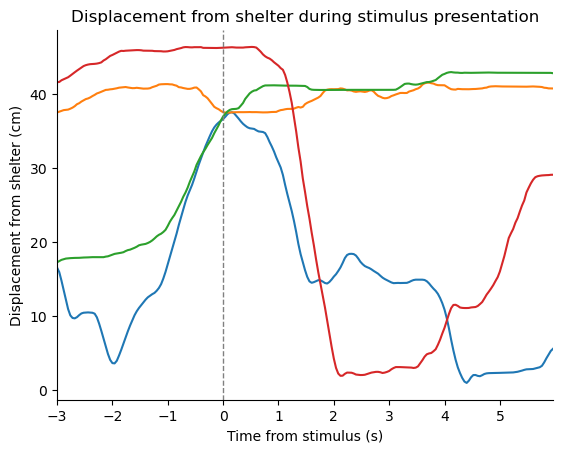

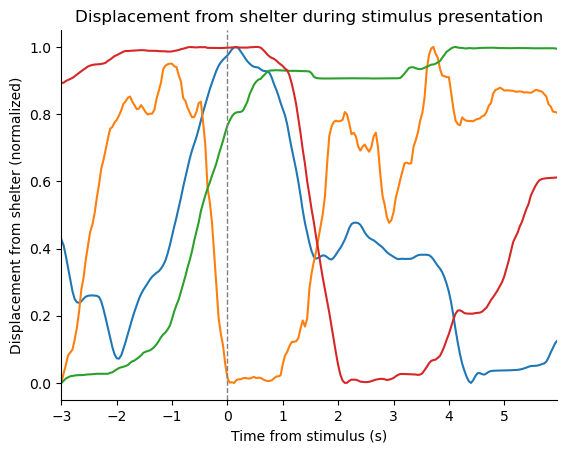

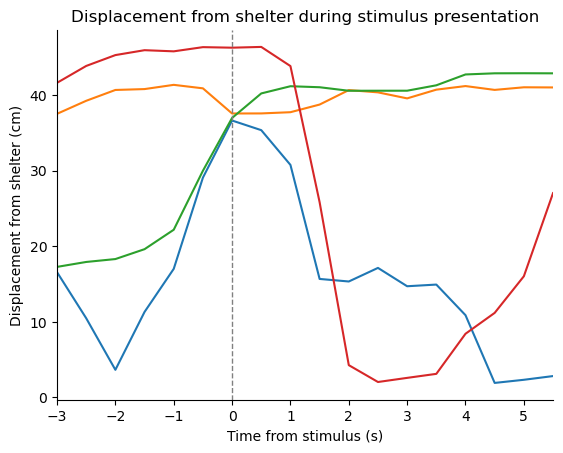

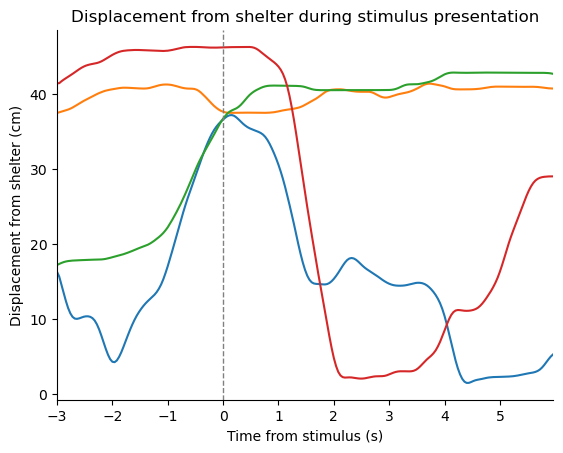

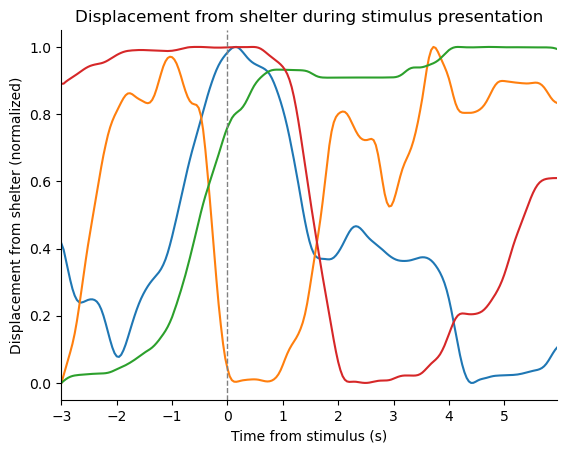

In [7]:
#parameters: number of mice (defined at top), start time, stop time, step (set to 25fps), parameter of interest, dataframe, whether you want to normalize
#just plotting to play around with different versions/compare - should try binning instead of gaussian filter
plot_all_displacement(n, -3,6, .04, 'displacement', 'coord_scaled', False)
plot_all_displacement(n, -3, 6, .04, 'displacement', 'coord_scaled', True)

plot_all_displacement(n, -3,6, .5, 'displacement', 'coord_scaled', False)

plot_all_displacement(n, -3,6, .04, 'displacement', 'coord_scaled_smooth', False)
plot_all_displacement(n, -3, 6, .04, 'displacement', 'coord_scaled_smooth', True)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

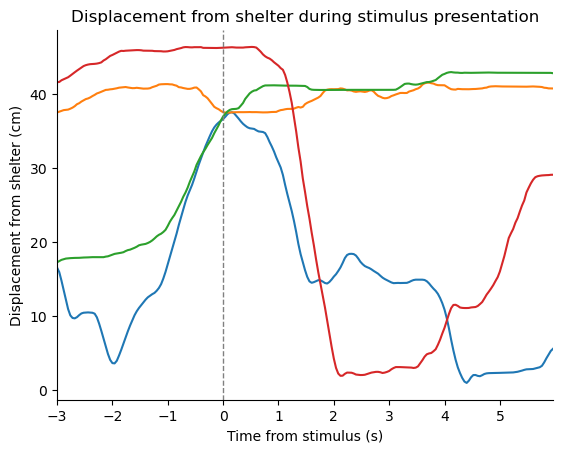

In [8]:
plot_all_displacement(n, -3,6, .04, 'displacement', 'coord_scaled', False)
#displacement without any filter or normalization

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

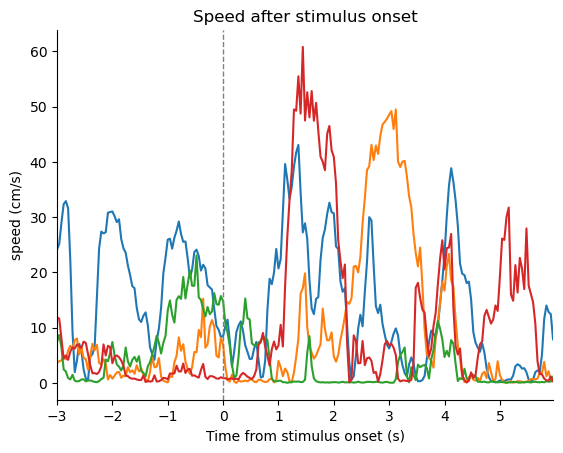

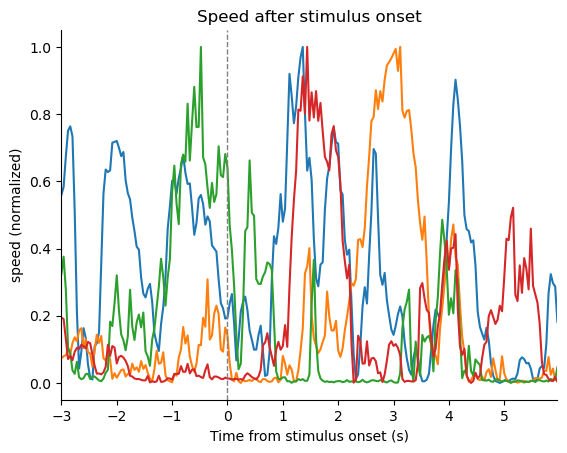

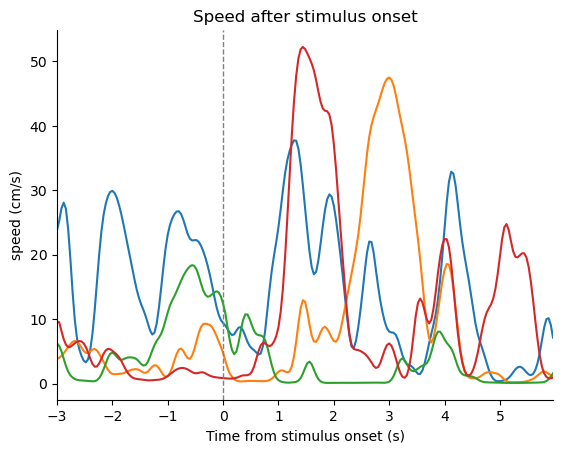

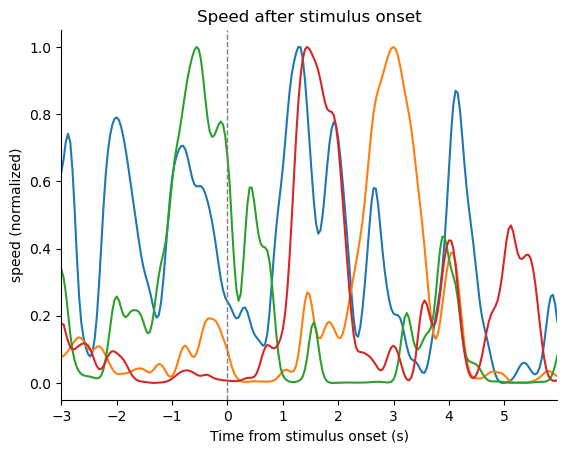

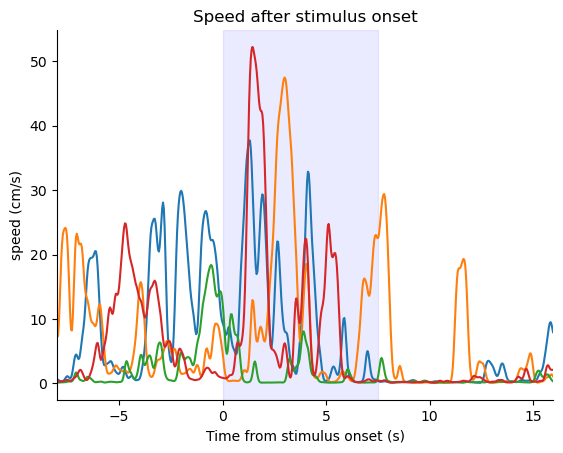

In [9]:
plot_all_speed(n, -3, 6, .04, 'speed', 'coord_scaled', False)
plot_all_speed(n, -3, 6, .04, 'speed', 'coord_scaled', True)

plot_all_speed(n, -3, 6, .04, 'speed', 'coord_scaled_smooth', False)
plot_all_speed(n, -3, 6, .04, 'speed', 'coord_scaled_smooth', True)

plot_all_speed(n, -8, 16, .04, 'speed', 'coord_scaled_smooth', False)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

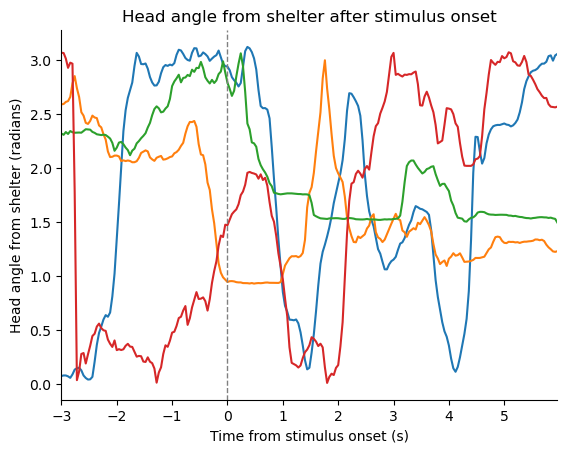

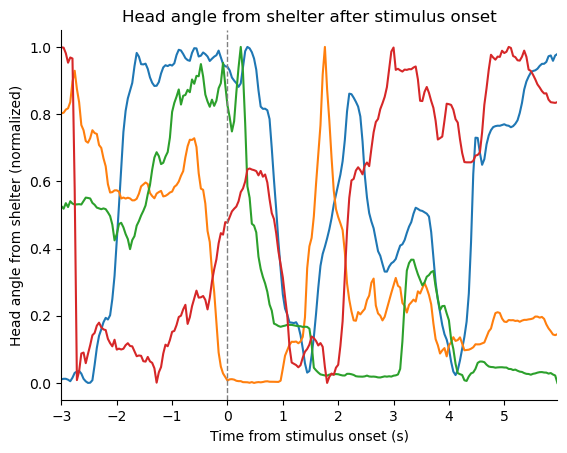

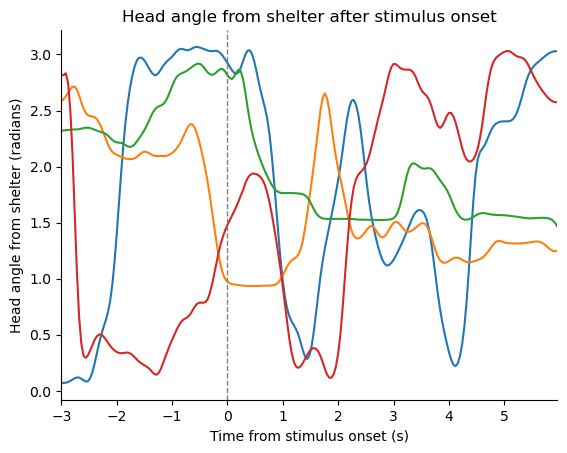

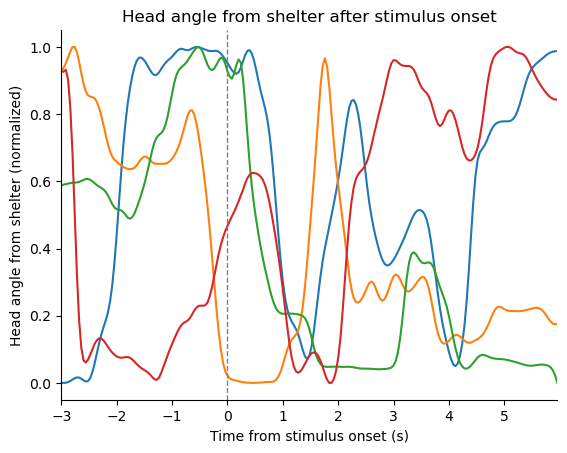

In [10]:
plot_all_angle(n, -3, 6, .04, 'head_angle', 'coord_scaled', False)
plot_all_angle(n, -3, 6, .04, 'head_angle', 'coord_scaled', True)

plot_all_angle(n, -3, 6, .04, 'head_angle', 'coord_scaled_smooth', False)
plot_all_angle(n, -3, 6, .04, 'head_angle', 'coord_scaled_smooth', True)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

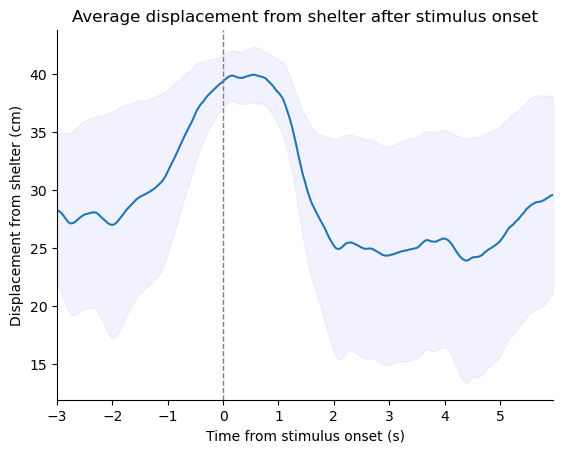

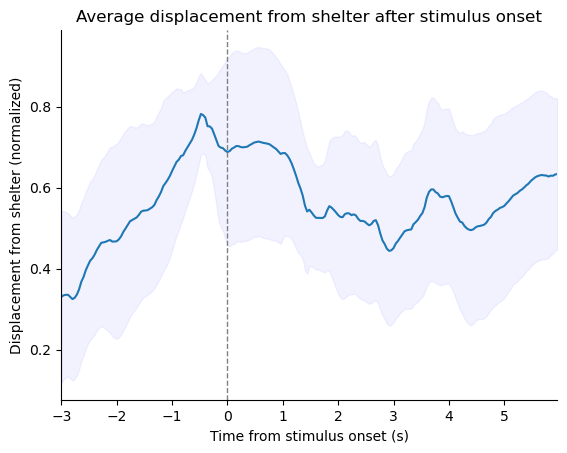

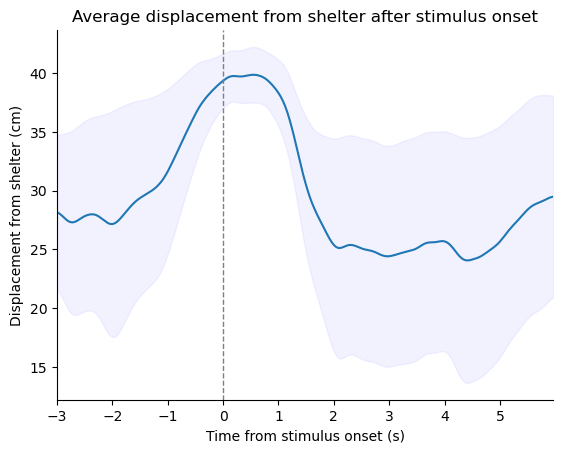

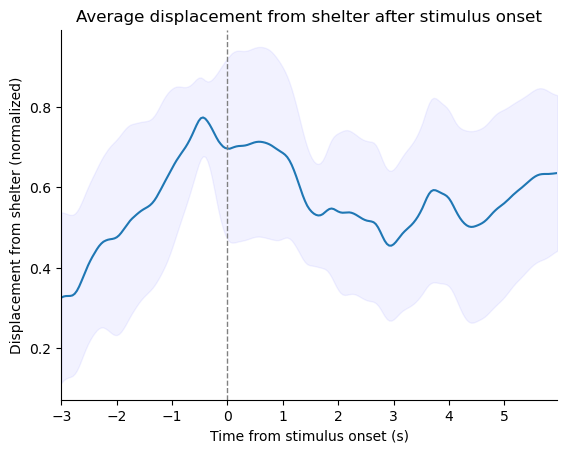

In [11]:
plot_compiled_displacement(n, -3, 6, .04, 'displacement', 'coord_scaled', False)
plot_compiled_displacement(n,-3, 6, .04, 'displacement', 'coord_scaled', True)

plot_compiled_displacement(n,-3, 6, .04, 'displacement', 'coord_scaled_smooth', False)
plot_compiled_displacement(n, -3, 6, .04, 'displacement', 'coord_scaled_smooth', True)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

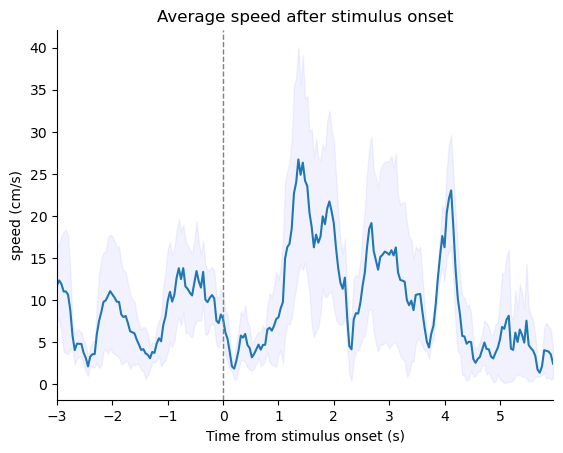

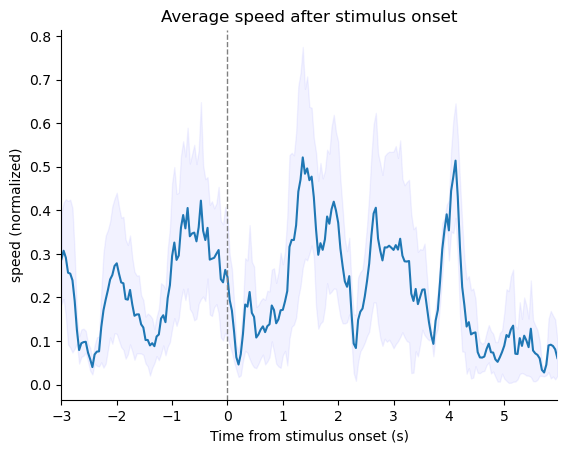

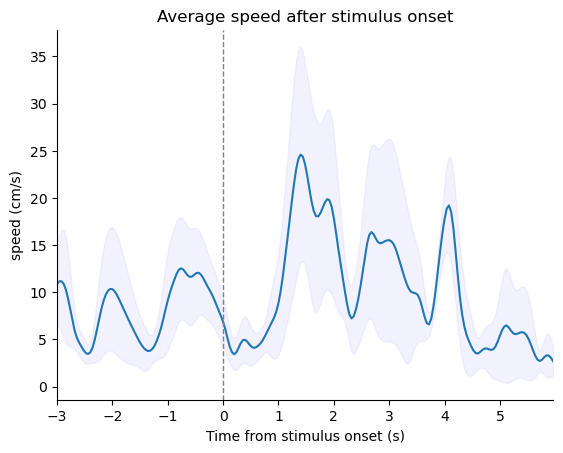

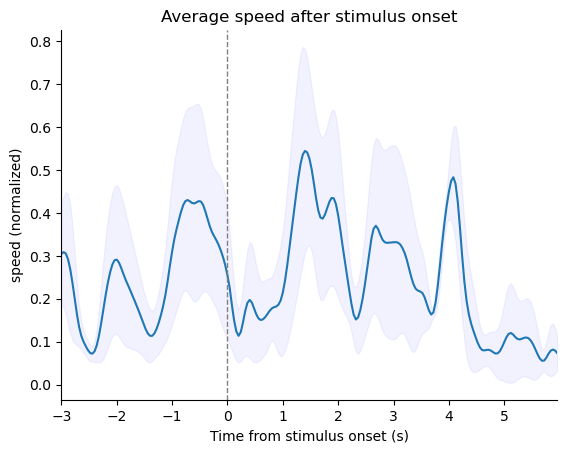

In [12]:
plot_compiled_speed(n, -3, 6, .04, 'speed', 'coord_scaled', False)
plot_compiled_speed(n, -3, 6, .04, 'speed', 'coord_scaled', True)

plot_compiled_speed(n, -3, 6, .04, 'speed', 'coord_scaled_smooth', False)
plot_compiled_speed(n, -3, 6, .04, 'speed', 'coord_scaled_smooth', True)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

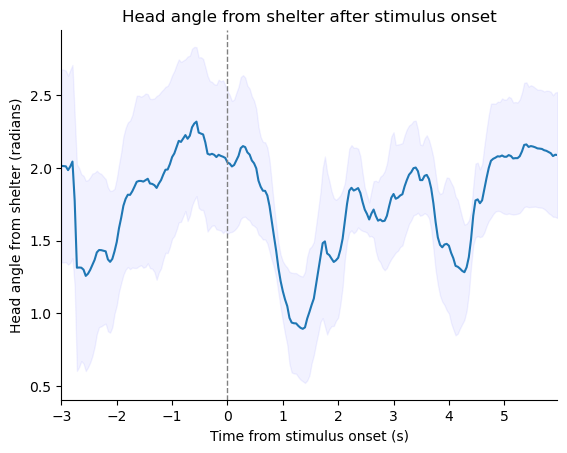

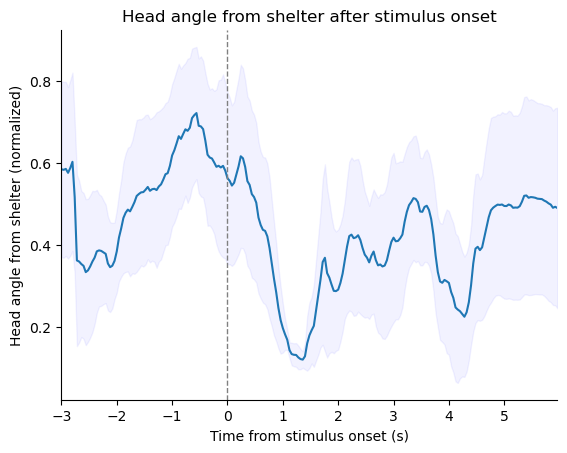

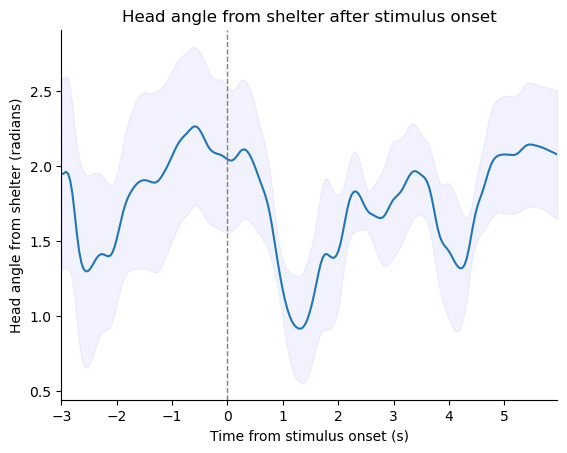

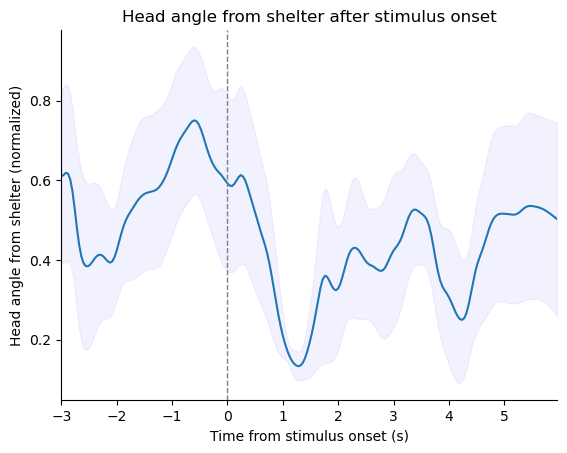

In [13]:
plot_compiled_angle(n, -3, 6, .04, 'head_angle', 'coord_scaled', False)
plot_compiled_angle(n, -3, 6, .04, 'head_angle', 'coord_scaled', True)

plot_compiled_angle(n, -3, 6, .04, 'head_angle', 'coord_scaled_smooth', False)
plot_compiled_angle(n, -3, 6, .04, 'head_angle', 'coord_scaled_smooth', True)

In [14]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'yellowgreen']
def plot_compiled_trajectory(n):
    fig = plt.figure()  #create figure to fill in
    ax = plt.axes()
    
    for i in range (1, n+1):
        mice = mouse_columns(n, 'rotate')
        df = globals()[mice[i-1]]
        ax.plot(df['rotated_shift_x'], df['rotated__shift_y'], color = colors[i-1], linewidth = 1)
        
    #add an arrow to show mouse's direction
        xf = df['rotated_shift_x'].iloc[-1] #final x coordinate
        xo = df['rotated_shift_x'].iloc[-2] #second to last x coordinate

        yf = df['rotated__shift_y'].iloc[-1] #final y coordinate
        yo = df['rotated__shift_y'].iloc[-2] #second to last y coordinate

    #plot arrow: base x, base y, displacement x, displacement y
        ax.arrow(xo, yo, xf-xo, yf-yo, head_width = .03, head_length = .03, fc =colors[i-1], ec = "none")
        ax.set_title('Trajectory after stimulus onset')  #would be after stimulus
        ax.set_xlabel('x-position (cm)', fontsize=12)
        ax.set_ylabel('y-position (cm)', fontsize=12)
    
        ax.arrow(xo, yo, xf-xo, yf-yo, head_width = 1, head_length = 1, fc = colors[i-1], ec = "none")

    #ax.arrow(xo, yo, xf-xo, yf-yo, head_width = .03, head_length = .03, fc = 'blue', ec = "none")
    platform = Ellipse(xy = (1, 0), width = x_diam, height = y_diam, edgecolor = 'black', facecolor = 'none', alpha = .5, linewidth = .8)
    ax.add_patch(platform)
    shelter = patches.Rectangle(((0 - 5.25), (25-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
    ax.add_patch(shelter)

    
    ax.set_aspect('equal')
    ax.text(0-1,25-1, 'S', color = 'black', size = 10)

    
    ax.axis('off')
    return plt

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

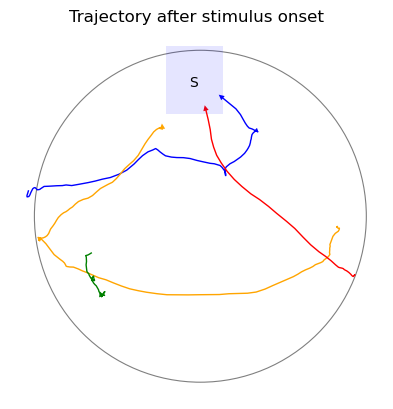

In [15]:
plot_compiled_trajectory(n)
#since the I'm shifting all the shelters to 0,25 some of the trajectories are shifted off of hte platform - use a different alignment method to avoid

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

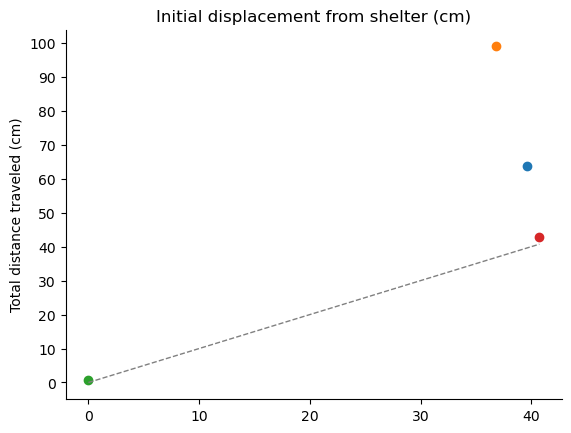

In [16]:
plot_linearity_ratio(n)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

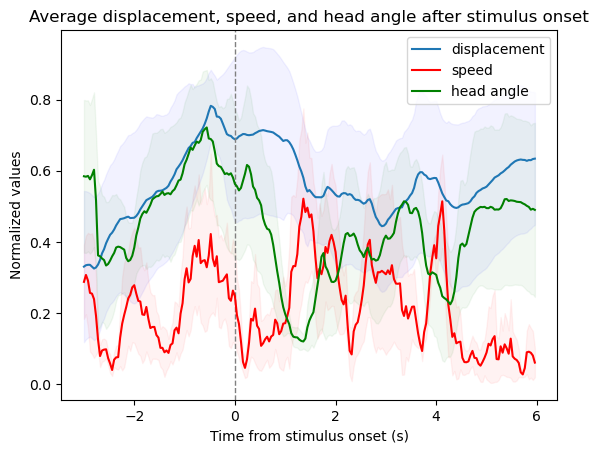

In [17]:
compile_parameters(n,-3, 6, .04, 'coord_scaled') #doesn't mean much because of normalization! reassess how to plot this/look at relationship!

In [18]:
#add graph for escapes (import escape for each mouse at top too)

In [19]:
#if you want graph with shelters in original positions, make sure the camera is in the same orientation each time, otherwise the stimuli are in different spots for different mice. 